### Problem 1 for the Data Set : Shoesales.csv

You are an analyst in the IJK shoe company and you are expected to forecast the sales of the pairs of shoes for the upcoming 12 months from where the data ends. The data for the pair of shoe sales have been given to you from January 1980 to July 1995.


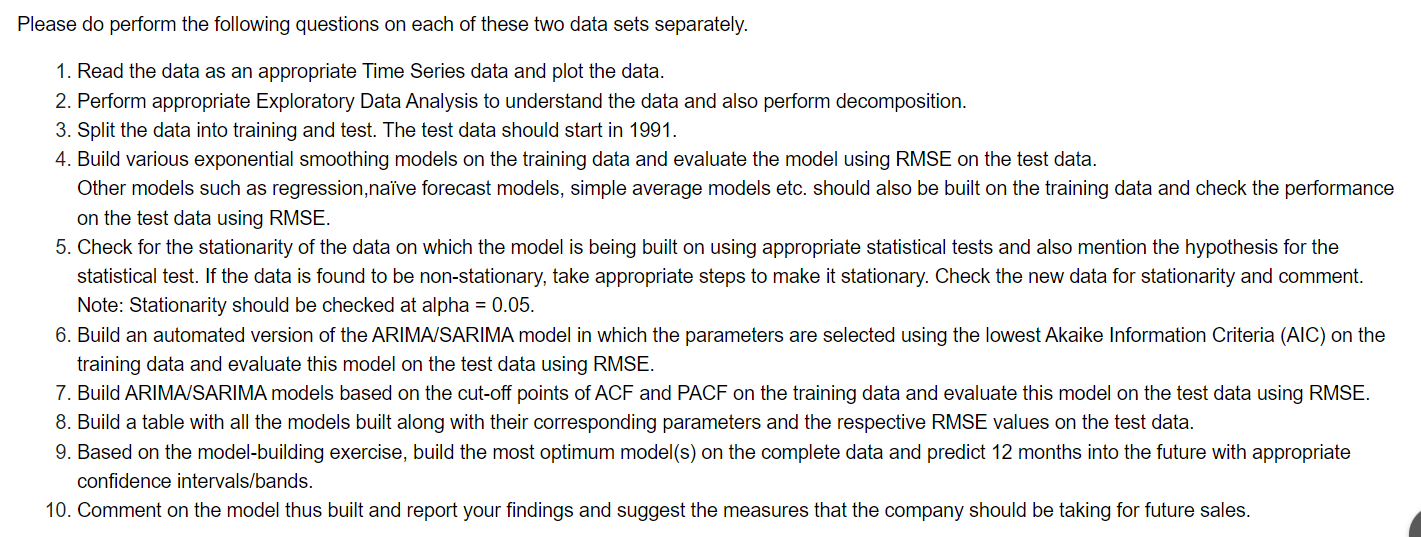

In [1]:
# Import the necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode()
%matplotlib inline
import seaborn as sns
from pylab import rcParams

### 1.Read the data as an appropriate Time Series data and plot the data.

In [3]:
df1 = pd.read_csv('Shoe-Sales.csv') # Reading the data
df1.head()

YearMonth  Shoe_Sales
0   1980-01          85
1   1980-02          89
2   1980-03         109
3   1980-04          95
4   1980-05          91

In [4]:
df1.tail()

YearMonth  Shoe_Sales
182   1995-03         188
183   1995-04         195
184   1995-05         189
185   1995-06         220
186   1995-07         274

In [5]:
df1.shape

(187, 2)

In [6]:
df1.dtypes

YearMonth     object
Shoe_Sales     int64
dtype: object

Here we can see that the YearMonth is showing as 'object' variable. we need to convert this data into time series data by parsing the date column and making it as index.

The Time series is having monthly series.

In [7]:
date = pd.date_range(start='1/1/1980', end='8/1/1995', freq='M')
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [8]:
df1['Time_Stamp'] = pd.DataFrame(date,columns=['Month'])
df1.head()

YearMonth  Shoe_Sales Time_Stamp
0   1980-01          85 1980-01-31
1   1980-02          89 1980-02-29
2   1980-03         109 1980-03-31
3   1980-04          95 1980-04-30
4   1980-05          91 1980-05-31

In [9]:
df1['Time_Stamp'] = pd.to_datetime(df1['Time_Stamp'])

In [10]:
df = df1.set_index('Time_Stamp')
df.drop(['YearMonth'], axis=1, inplace=True)
df.head()#First five rows of the data

Shoe_Sales
Time_Stamp            
1980-01-31          85
1980-02-29          89
1980-03-31         109
1980-04-30          95
1980-05-31          91

In [11]:
from pylab import rcParams

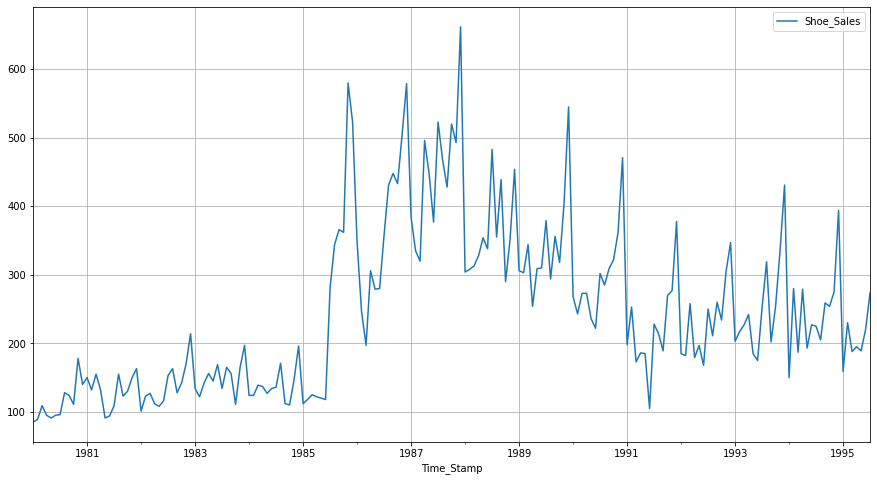

In [12]:
# Timeseries plot
from pylab import rcParams
rcParams['figure.figsize'] = 15,8
df.plot();
plt.grid()
plt.savefig('ts.png')

***Time series plots can help us spot time-dependent patterns in the data values, such as increasing or decreasing trends, changes in the mean or variability over time.***

* Time series plots help us look for repeating patterns such as cycles or seasonal fluctuations.

* Time series data has four aspects of behaviour: Trend, Seasonality, Cycles & Unexplained Variation.

* Trend is the overall long time direction of the series..

* Seasonality occurs when there is repeated behaviour in the data which occurs at regular intervals. It is related to seasonal natural or human behaviour.

From the above time series plot we can see that both the trend and seasonality is having the Sudden increase in the trend and seasonality and slow decrease in terms of both trend and seasonality.

Hence, the time series data shows both trend & seasonality.

The plot clearly shows that the series is of multiplicative model.

We can also observe the gradual slow decrease in the trend from 1987.

### 2.Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

In [13]:
df.info() #Checking info of the data

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-31 to 1995-07-31
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Shoe_Sales  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


we can see the index as DatetimeIndex and variable Shoe_Sales of int64 datatype.

In [14]:
df.shape #Shape of the data

(187, 1)

The number of rows = 187

The number of columns = 1

In [15]:
df.isnull().sum() #Checking null values

Shoe_Sales    0
dtype: int64

There are no null values present on the dataset.

In [16]:
df.describe().T #Description of the data

count        mean         std   min    25%    50%    75%    max
Shoe_Sales  187.0  245.636364  121.390804  85.0  143.5  220.0  315.5  662.0

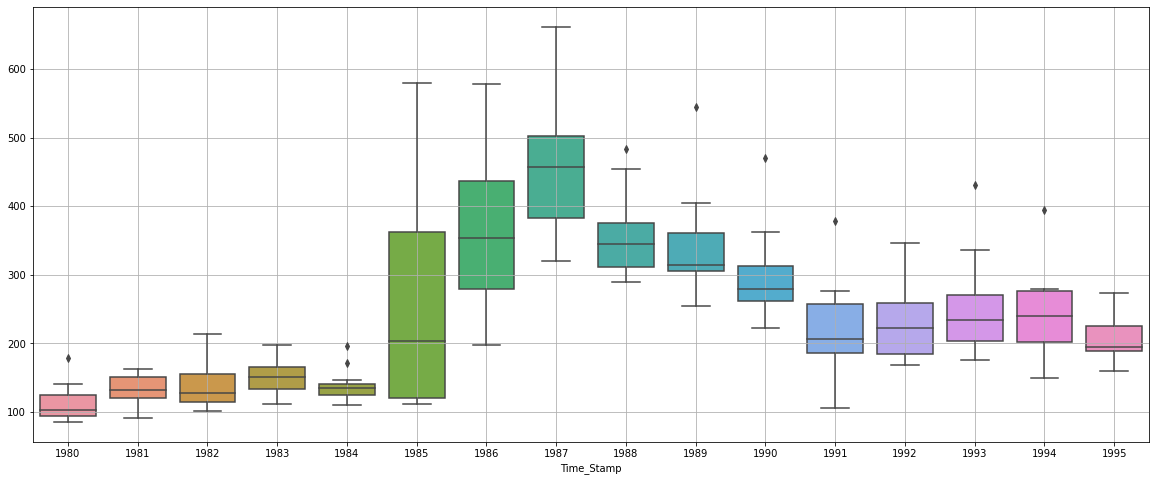

In [17]:
#Boxplot for Years
_, ax = plt.subplots(figsize=(20,8))
sns.boxplot(x = df.index.year,y = df.values[:,0],ax=ax)
plt.grid();
#plt.savefig('yearly boxplot.png')

From the Yearly boxplot, we can see the trend, Seasonality and the outliers present in the data.

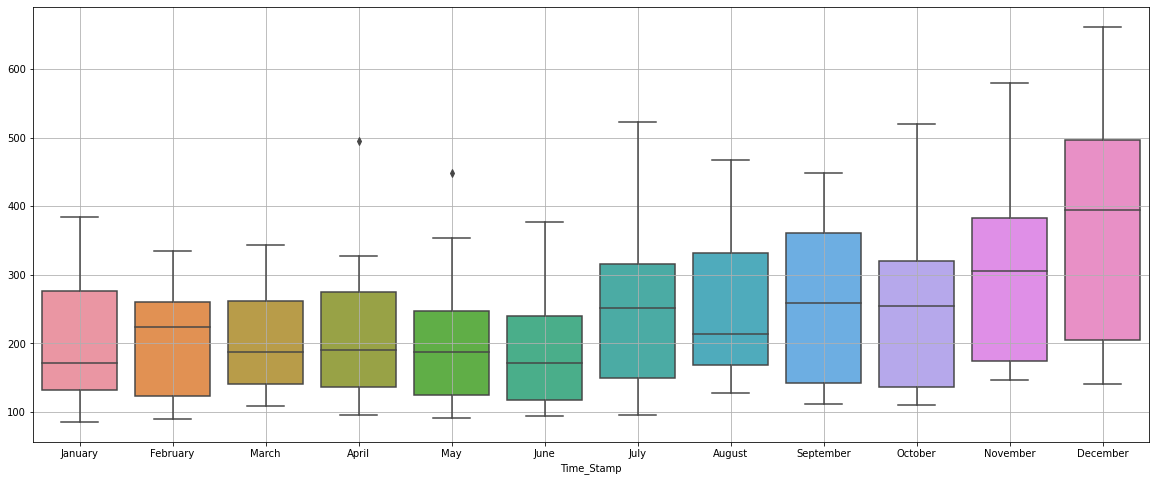

In [18]:
#Boxplot for Months
_, ax = plt.subplots(figsize=(20,8))
sns.boxplot(x = df.index.month_name(),y = df.values[:,0],ax=ax)
plt.grid();
#plt.savefig('Monthly boxplot.png')

We can observe the slight spike & drop of trend in the monthly boxplot and there are less number of outliers present in monthly series data.

- Outliers are present only in April and May months.
- We can observe the spike of sales is in September, November, December for all the years.
- The December month is having the highest spike of sales every year.

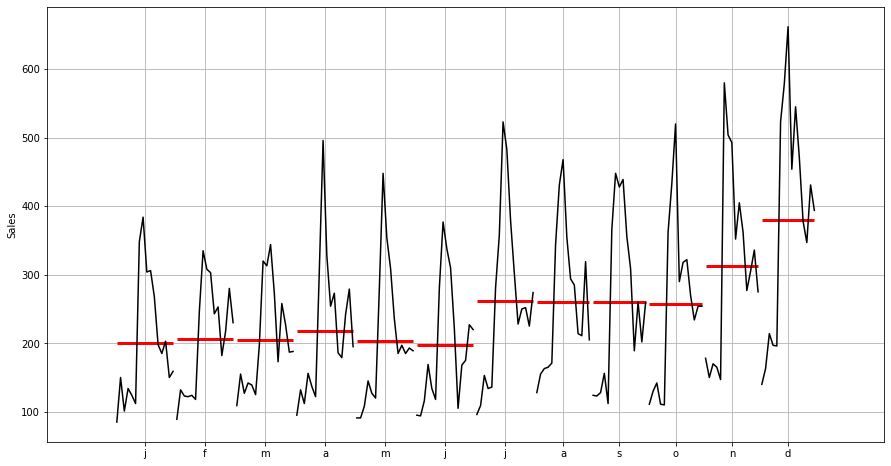

In [19]:
#Plotting a time series monthplot to understand the spread of Sales across 
#different years and within different months across years.

from statsmodels.graphics.tsaplots import month_plot

month_plot(df['Shoe_Sales'],ylabel='Sales')
plt.grid();
#plt.savefig('tsm plot.png')

From the above discrete time series plot, we can understand the behaviour of the time series data through the median which is represented as *red line*.

we can observe that, the median is constant in the first few months and there is a slight variation from July to october and November  and december months.

In [20]:
# Plot a time series monthplot to understand the spread of Sales across different years
# and within different months across years
monthly_sales_across_years = pd.pivot_table(df, values = 'Shoe_Sales', columns = df.index.month, index = df.index.year)
monthly_sales_across_years

Time_Stamp     1      2      3      4      5      6      7      8      9   \
Time_Stamp                                                                  
1980         85.0   89.0  109.0   95.0   91.0   95.0   96.0  128.0  124.0   
1981        150.0  132.0  155.0  132.0   91.0   94.0  109.0  155.0  123.0   
1982        101.0  123.0  127.0  112.0  108.0  116.0  153.0  163.0  128.0   
1983        134.0  122.0  142.0  156.0  145.0  169.0  134.0  165.0  156.0   
1984        124.0  124.0  139.0  137.0  127.0  134.0  136.0  171.0  112.0   
1985        112.0  118.0  125.0  122.0  120.0  118.0  281.0  344.0  366.0   
1986        348.0  246.0  197.0  306.0  279.0  280.0  358.0  431.0  448.0   
1987        384.0  335.0  320.0  496.0  448.0  377.0  523.0  468.0  428.0   
1988        304.0  308.0  313.0  328.0  354.0  338.0  483.0  355.0  439.0   
1989        306.0  303.0  344.0  254.0  309.0  310.0  379.0  294.0  356.0   
1990        268.0  243.0  273.0  273.0  236.0  222.0  302.0  285.0  309.0   
1991        198.0  253.0  173.0  186.0  185.0  105.0  228.0  214.0  189.0   
1992        185.0  182.0  258.0  179.0  197.0  168.0  250.0  211.0  260.0   
1993        203.0  217.0  227.0  242.0  185.0  175.0  252.0  319.0  202.0   
1994        150.0  280.0  187.0  279.0  193.0  227.0  225.0  205.0  259.0   
1995        159.0  230.0  188.0  195.0  189.0  220.0  274.0    NaN    NaN   

Time_Stamp     10     11     12  
Time_Stamp                       
1980        111.0  178.0  140.0  
1981        130.0  150.0  163.0  
1982        142.0  170.0  214.0  
1983        111.0  165.0  197.0  
1984        110.0  147.0  196.0  
1985        362.0  580.0  523.0  
1986        433.0  504.0  579.0  
1987        520.0  493.0  662.0  
1988        290.0  352.0  454.0  
1989        318.0  405.0  545.0  
1990        322.0  362.0  471.0  
1991        270.0  277.0  378.0  
1992        234.0  305.0  347.0  
1993        254.0  336.0  431.0  
1994        254.0  275.0  394.0  
1995          NaN    NaN    NaN

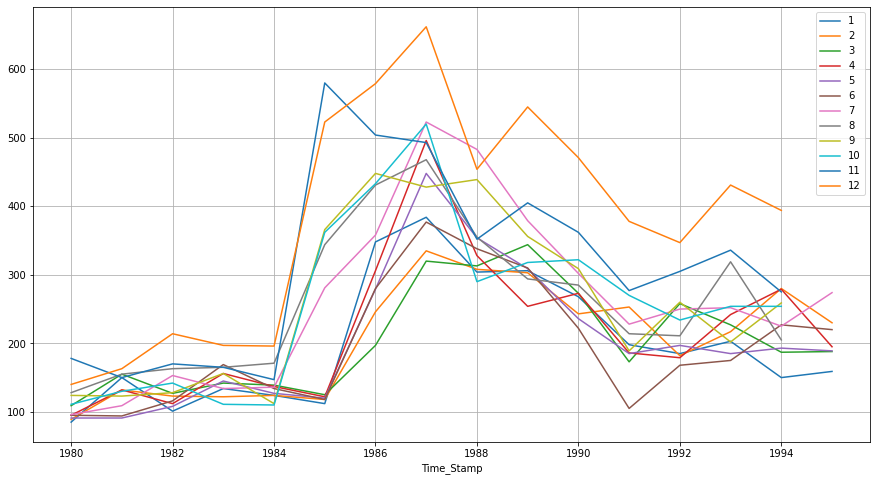

In [21]:
monthly_sales_across_years.plot()
plt.grid()
plt.legend(loc='best');
#plt.savefig('tsm plot2.png')

The above line plot shoes the monthly sales performance of ShoeSales across every year. Generally, November and december months are having the highest sales compared to others. The shoesales are highest and almost in peak stage in the year 1987. December month is having the huge spike of sales in 1987. Also, for november month we can see the highest peak sales in 1985.

### Read this monthly data into a quarterly and yearly format. Compare the time series plot and draw inferences.

In [22]:
#yearly_plots
df_yearly_sales_sum = df.resample('A').sum()
df_yearly_sales_sum.head()

Shoe_Sales
Time_Stamp            
1980-12-31        1341
1981-12-31        1584
1982-12-31        1657
1983-12-31        1796
1984-12-31        1657

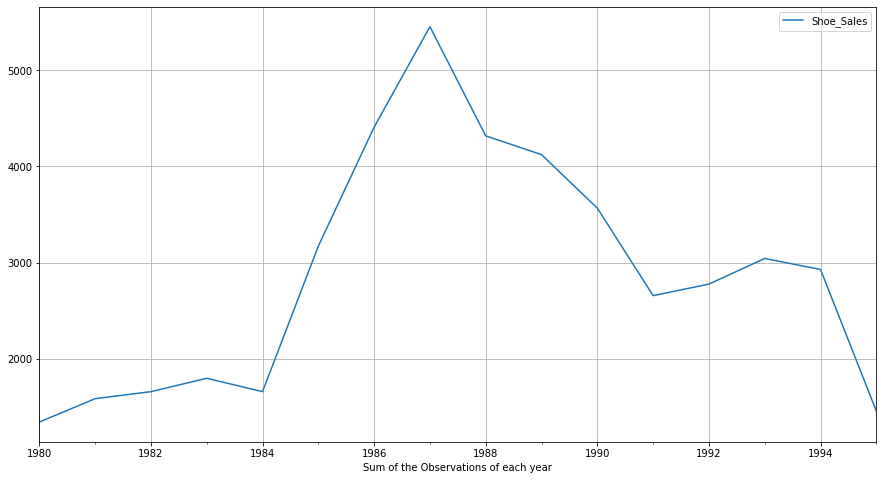

In [23]:
df_yearly_sales_sum.plot();
plt.grid()
plt.xlabel('Sum of the Observations of each year');

From the above plot, we can observe there is seasonality and trend. The sales across years for all the months are displayed in the graph. we can observe a clear highest spike from 1984 to 1987. Also, the year 1987 has the highest peak point in sales.

In [24]:
df_yearly_sales_mean = df.resample('Y').mean()
df_yearly_sales_mean.head()

Shoe_Sales
Time_Stamp            
1980-12-31  111.750000
1981-12-31  132.000000
1982-12-31  138.083333
1983-12-31  149.666667
1984-12-31  138.083333

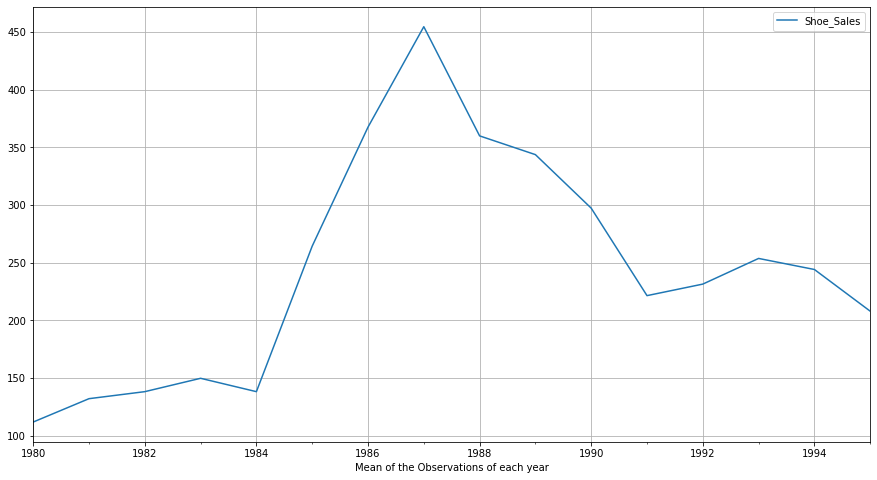

In [25]:
df_yearly_sales_mean.plot();
plt.grid()
plt.xlabel('Mean of the Observations of each year');

From the above plot, we can observe the trend, seasonality and the average sales across each year.

In [26]:
#Quarterly Plots
df_quarterly_sales_sum = df.resample('Q').sum()
df_quarterly_sales_sum.head()

Shoe_Sales
Time_Stamp            
1980-03-31         283
1980-06-30         281
1980-09-30         348
1980-12-31         429
1981-03-31         437

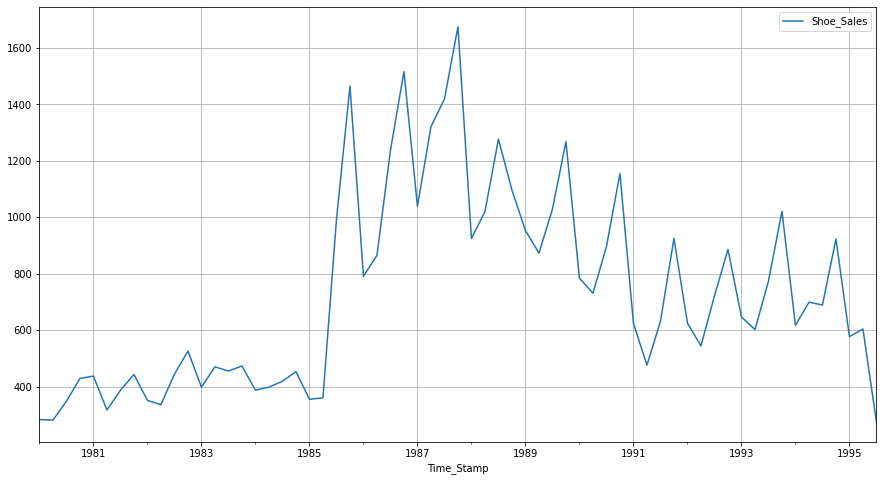

In [27]:
df_quarterly_sales_sum.plot();
plt.grid()

In [28]:
df_quarterly_sales_mean = df.resample('Q').mean()
df_quarterly_sales_mean.head()

Shoe_Sales
Time_Stamp            
1980-03-31   94.333333
1980-06-30   93.666667
1980-09-30  116.000000
1980-12-31  143.000000
1981-03-31  145.666667

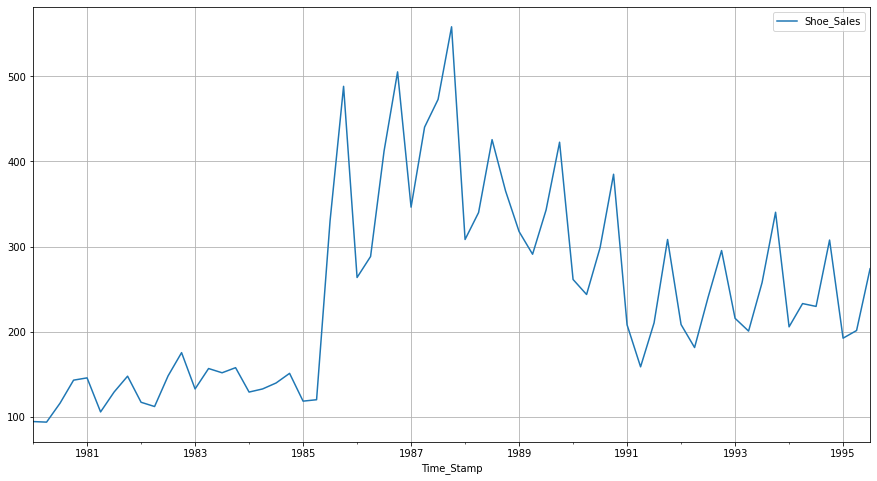

In [29]:
df_quarterly_sales_mean.plot();
plt.grid()

From the above Quarterly plots, we can see the slight smoothening of the curve. The trend and seasonality are also clearly visible. Both the sum and average sales plots are almost same.

In [30]:
#Daily Plots
df_daily_sales_sum = df.resample('D').sum()
df_daily_sales_sum

Shoe_Sales
Time_Stamp            
1980-01-31          85
1980-02-01           0
1980-02-02           0
1980-02-03           0
1980-02-04           0
...                ...
1995-07-27           0
1995-07-28           0
1995-07-29           0
1995-07-30           0
1995-07-31         274

[5661 rows x 1 columns]

In [31]:
#If the data is resampled on daily basis, the values which the original series can not provide is taken as 0 by python

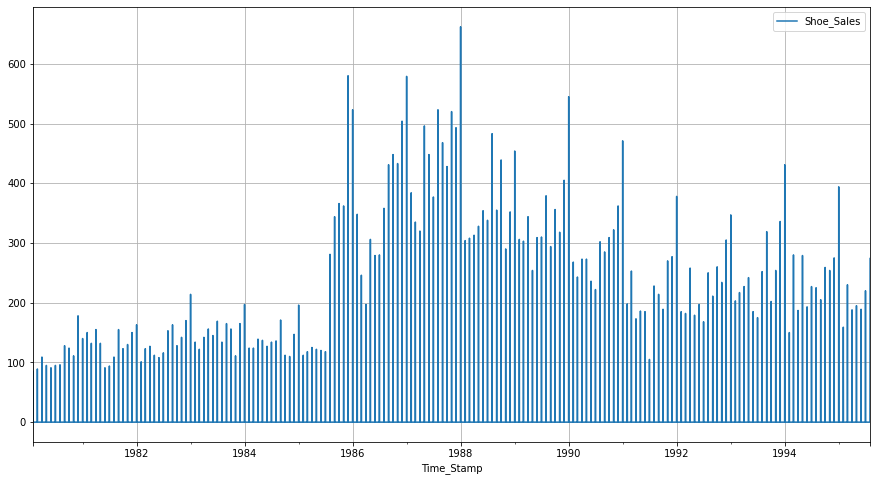

In [32]:
df_daily_sales_sum.plot()
plt.grid();

Resampling the data to daily interval where the number of observations are 0 is not a good practise beacause it does not give us clear understanding of the behaviour of the time series.

In [33]:
# Decade plot
df_decade_sales_sum = df.resample('10Y').sum()
df_decade_sales_sum

Shoe_Sales
Time_Stamp            
1980-12-31        1341
1990-12-31       31735
2000-12-31       12858

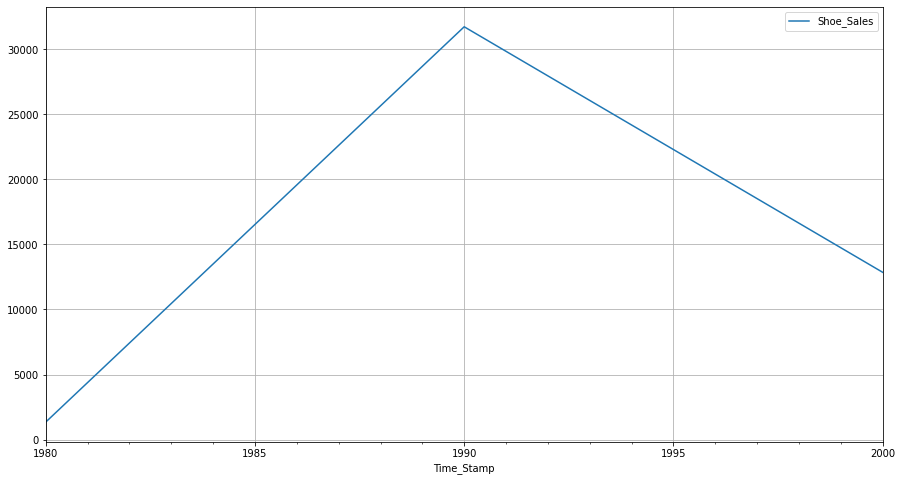

In [34]:
df_decade_sales_sum.plot();
plt.grid()

from the Decade Plot, we observe the smoothened seasonality. But the trend is clearly visible.

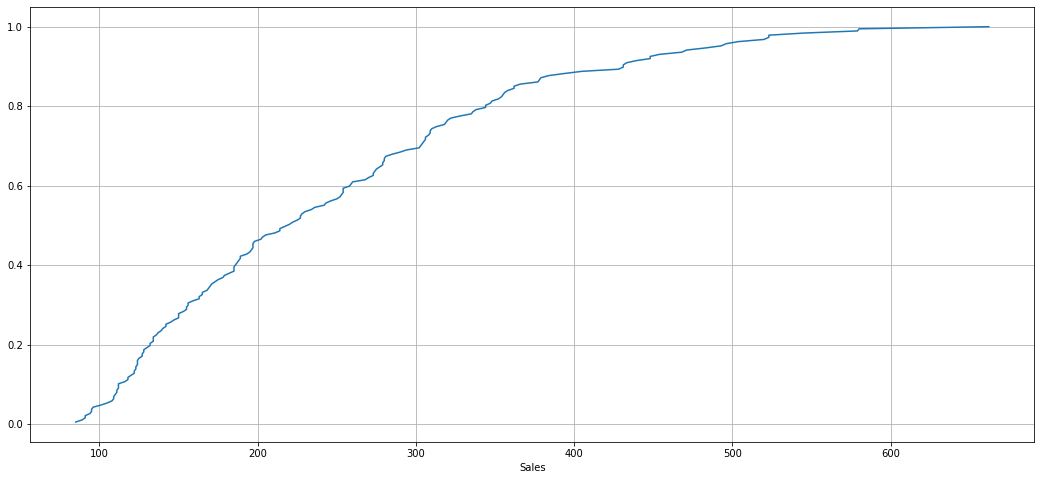

In [35]:
#Empirical Cummulative Distribution Curve

from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (18, 8))
cdf = ECDF(df['Shoe_Sales'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Sales');
#plt.savefig('ECD curve.png')

The Emperical distribution curve shows the overall sales distribution of Shoe sales.

In [36]:
df['Shoe_Sales'].min() #minimum sale value

85

In [37]:
df['Shoe_Sales'].max() #maximum sale value

662

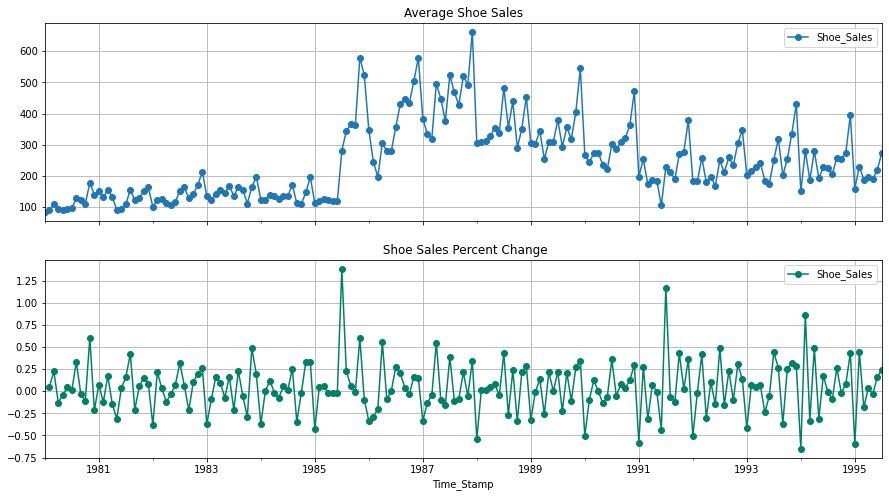

In [38]:
# Plot the average RetailSales per month and the month on month percentage change of RetailSales 
#group by date and get average Sales, and precent change

avg    = df.groupby(df.index)["Shoe_Sales"].mean()
pct_change = df.groupby(df.index)["Shoe_Sales"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average Sales over time(year-month)
ax1 = avg.plot(legend=True,ax=axis1,marker='o',title="Average Shoe Sales",grid=True)
ax1.set_xticks(range(len(avg)))
ax1.set_xticklabels(avg.index.tolist())

# plot precent change for RetailSales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title=" Shoe Sales Percent Change",grid=True)

## Decomposition

Decomposing the the time series data plays an important role in forecasting and improving forecast accuracy.

Seasonal_decompose uses the classical decomposition method. There are two types of decomposition in this.

1. Additive Decomposition: It is a Linear model. The components are added together. i.e., Y = T + S + R.

2. Multiplicative Decomposition: It's a non-linear model. The components are multiplied together. i.e., Y = T * S * R.

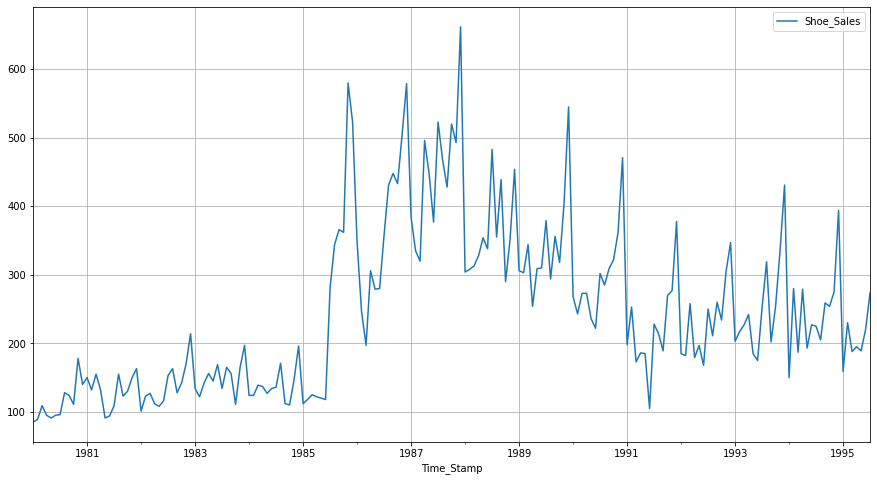

In [39]:
# Timeseries plot
from pylab import rcParams
rcParams['figure.figsize'] = 15,8
df.plot();
plt.grid()

The time series data shows both trend & seasonality.

The plot clearly shows that the series is of multiplicative model.

But, I am doing both the Additive and Multiplicative models to understand the difference between then clearly.

### Additive Decomposition

In [40]:
from statsmodels.tsa.seasonal import   seasonal_decompose

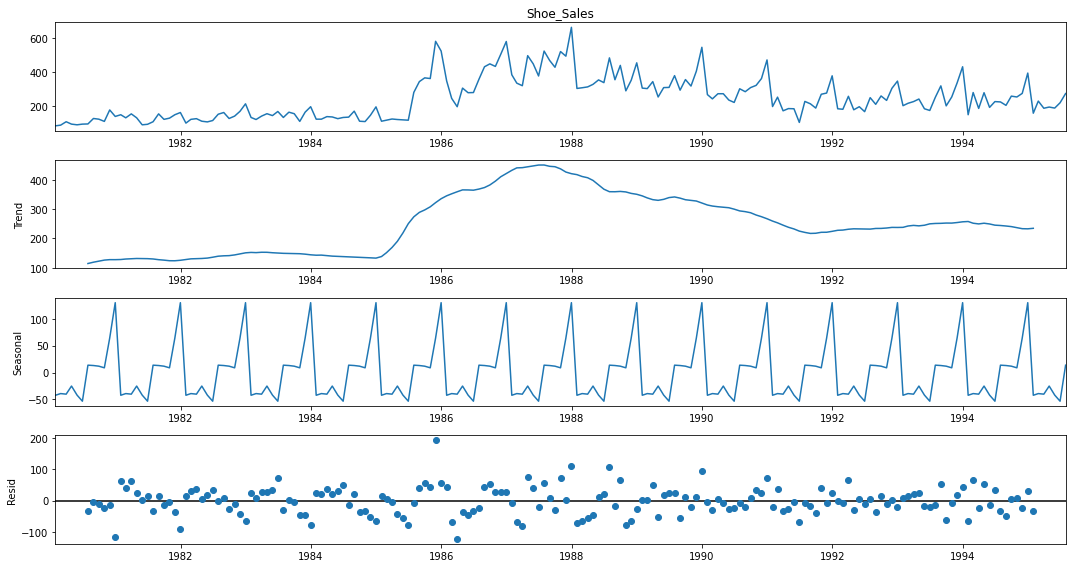

In [41]:
decomposition_a = seasonal_decompose(df['Shoe_Sales'],model='additive')
decomposition_a.plot();

From the above decomposition plot, we can see that the time series data is having the trend, seasonality in both increasing and decreasing fashion. we can see very high residual from -100 to +100 on Y- axis.

Hence, It is very clear that the time series is not additive.

In [42]:
trend = decomposition_a.trend
seasonality = decomposition_a.seasonal
residual = decomposition_a.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    114.458333
1980-08-31    118.958333
1980-09-30    122.666667
1980-10-31    126.125000
1980-11-30    127.666667
1980-12-31    127.625000
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    -42.175463
1980-02-29    -39.062566
1980-03-31    -40.122090
1980-04-30    -25.092328
1980-05-31    -41.878042
1980-06-30    -53.208399
1980-07-31     13.741204
1980-08-31     13.077315
1980-09-30     11.866204
1980-10-31      8.835648
1980-11-30     64.152315
1980-12-31    129.866204
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    -32.199537
1980-08-31     -4.035648
1980-09-30    -10.532870
1980-10-31    -23.960648
1980-11-30    -13.818

### Multiplicative Model

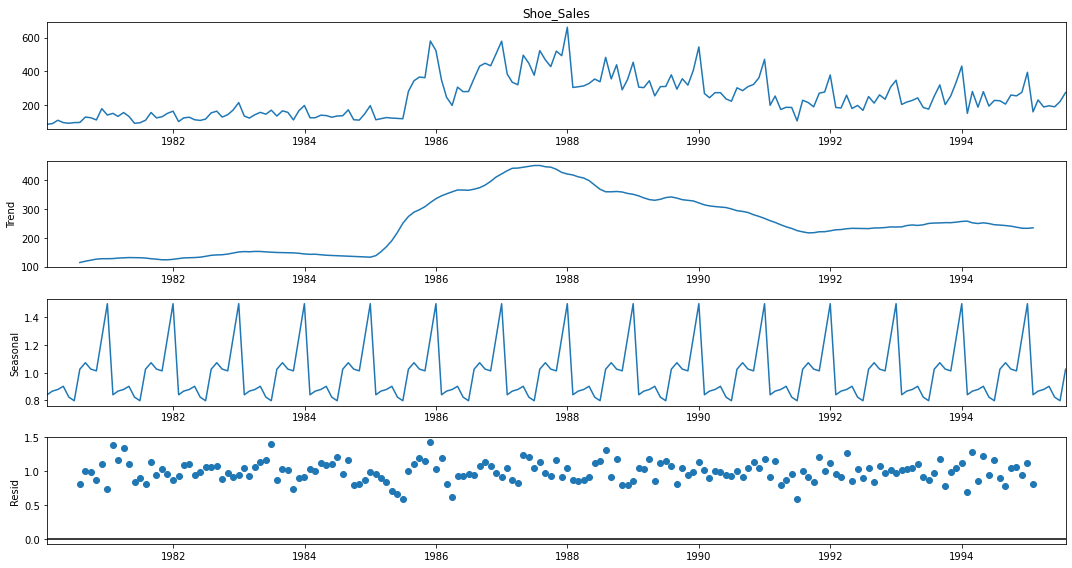

In [43]:
decomposition_m = seasonal_decompose(df['Shoe_Sales'],model='multiplicative')
decomposition_m.plot();

From the above decomposition plot, we can see that the time series data is having the trend, seasonality in both increasing and decreasing fashion. The residual is lying from 0.5 to 1.5 on Y- axis which is very low when compared to the additive model.

Also, the magnitude of the seasonal component changes with time.

### Hence, It is very clear that the time series is Multiplicative.

In [44]:
trend = decomposition_m.trend
seasonality = decomposition_m.seasonal
residual = decomposition_m.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    114.458333
1980-08-31    118.958333
1980-09-30    122.666667
1980-10-31    126.125000
1980-11-30    127.666667
1980-12-31    127.625000
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    0.840405
1980-02-29    0.866682
1980-03-31    0.878675
1980-04-30    0.901826
1980-05-31    0.823141
1980-06-30    0.797254
1980-07-31    1.025527
1980-08-31    1.072445
1980-09-30    1.026307
1980-10-31    1.013557
1980-11-30    1.254223
1980-12-31    1.499958
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    0.817856
1980-08-31    1.003322
1980-09-30    0.984958
1980-10-31    0.868308
1980-11-30    1.111649
1980-12-31    0.731330
Name: resid, dtype:

### 3. Split the data into training and test. The test data should start in 1991.

In [45]:
#Train-Test Split

Train=df[df.index.year < 1991]
Test=df[df.index.year >= 1991]

In [46]:
print(Train.shape)
print(Test.shape)

(132, 1)
(55, 1)


In [47]:
print('First few rows of Training Data','\n',Train.head(),'\n')
print('Last few rows of Training Data','\n',Train.tail(),'\n')
print('First few rows of Test Data','\n',Test.head(),'\n')
print('Last few rows of Test Data','\n',Test.tail(),'\n')

First few rows of Training Data 
             Shoe_Sales
Time_Stamp            
1980-01-31          85
1980-02-29          89
1980-03-31         109
1980-04-30          95
1980-05-31          91 

Last few rows of Training Data 
             Shoe_Sales
Time_Stamp            
1990-08-31         285
1990-09-30         309
1990-10-31         322
1990-11-30         362
1990-12-31         471 

First few rows of Test Data 
             Shoe_Sales
Time_Stamp            
1991-01-31         198
1991-02-28         253
1991-03-31         173
1991-04-30         186
1991-05-31         185 

Last few rows of Test Data 
             Shoe_Sales
Time_Stamp            
1995-03-31         188
1995-04-30         195
1995-05-31         189
1995-06-30         220
1995-07-31         274 



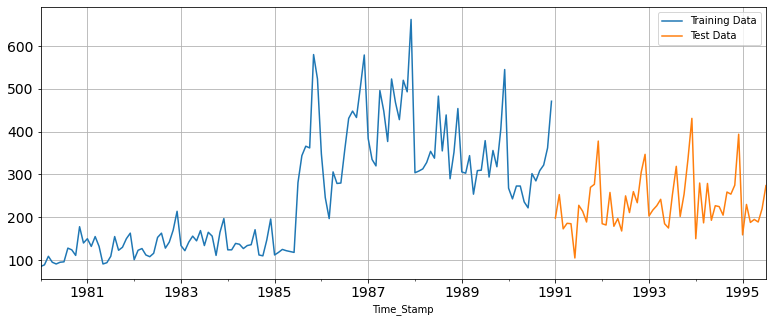

In [48]:
Train['Shoe_Sales'].plot(figsize=(13,5), fontsize=14)
Test['Shoe_Sales'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()
#plt.savefig('train-test.png')

We can see that now the train & test data are split, The test data starts from 1991 where as the train data starts before 1981 & ends 1990. From train test split we can predict the similar performance compared to past years.

### 4. Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models and simple average models. should also be built on the training data and check the performance on the test data using RMSE.

#### RMSE — Root Mean Squared Error

RMSE tells you how many units your model is wrong on average.

#### Model1: Linear Regression

For linear regression, the equation will be y=a+b(time)

For this particular linear regression, we are going to regress the 'Shoe_Sales' variable against the order of the occurrence. For this we need to modify our training data before fitting it into a linear regression.

In [49]:
train_time = [i+1 for i in range(len(Train))]
test_time = [i+43 for i in range(len(Test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97]


In [50]:
#we have generated the numerical time instance order for both the training and test data. 
#Now we will add these values in the training and test data.

In [51]:
LinearRegression_train = Train.copy()
LinearRegression_test = Test.copy()

In [52]:
LinearRegression_train['Time'] = train_time
LinearRegression_test['Time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Shoe_Sales  Time
Time_Stamp                  
1980-01-31          85     1
1980-02-29          89     2
1980-03-31         109     3
1980-04-30          95     4
1980-05-31          91     5 

Last few rows of Training Data 
             Shoe_Sales  Time
Time_Stamp                  
1990-08-31         285   128
1990-09-30         309   129
1990-10-31         322   130
1990-11-30         362   131
1990-12-31         471   132 

First few rows of Test Data 
             Shoe_Sales  Time
Time_Stamp                  
1991-01-31         198    43
1991-02-28         253    44
1991-03-31         173    45
1991-04-30         186    46
1991-05-31         185    47 

Last few rows of Test Data 
             Shoe_Sales  Time
Time_Stamp                  
1995-03-31         188    93
1995-04-30         195    94
1995-05-31         189    95
1995-06-30         220    96
1995-07-31         274    97 



In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
lr = LinearRegression()

In [55]:
lr.fit(LinearRegression_train[['Time']],LinearRegression_train['Shoe_Sales'].values)

LinearRegression()

In [56]:
#predictions on train data
train_predictions_model1 = lr.predict(LinearRegression_train[['Time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1
print([train_predictions_model1])

[array([ 82.06550467,  84.63818029,  87.2108559 ,  89.78353152,
        92.35620714,  94.92888276,  97.50155837, 100.07423399,
       102.64690961, 105.21958522, 107.79226084, 110.36493646,
       112.93761207, 115.51028769, 118.08296331, 120.65563892,
       123.22831454, 125.80099016, 128.37366577, 130.94634139,
       133.51901701, 136.09169263, 138.66436824, 141.23704386,
       143.80971948, 146.38239509, 148.95507071, 151.52774633,
       154.10042194, 156.67309756, 159.24577318, 161.81844879,
       164.39112441, 166.96380003, 169.53647564, 172.10915126,
       174.68182688, 177.25450249, 179.82717811, 182.39985373,
       184.97252935, 187.54520496, 190.11788058, 192.6905562 ,
       195.26323181, 197.83590743, 200.40858305, 202.98125866,
       205.55393428, 208.1266099 , 210.69928551, 213.27196113,
       215.84463675, 218.41731236, 220.98998798, 223.5626636 ,
       226.13533922, 228.70801483, 231.28069045, 233.85336607,
       236.42604168, 238.9987173 , 241.57139292, 244.1

In [57]:
#predictions on test data
test_predictions_model1 = lr.predict(LinearRegression_test[['Time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1
print([test_predictions_model1])

[array([190.11788058, 192.6905562 , 195.26323181, 197.83590743,
       200.40858305, 202.98125866, 205.55393428, 208.1266099 ,
       210.69928551, 213.27196113, 215.84463675, 218.41731236,
       220.98998798, 223.5626636 , 226.13533922, 228.70801483,
       231.28069045, 233.85336607, 236.42604168, 238.9987173 ,
       241.57139292, 244.14406853, 246.71674415, 249.28941977,
       251.86209538, 254.434771  , 257.00744662, 259.58012223,
       262.15279785, 264.72547347, 267.29814909, 269.8708247 ,
       272.44350032, 275.01617594, 277.58885155, 280.16152717,
       282.73420279, 285.3068784 , 287.87955402, 290.45222964,
       293.02490525, 295.59758087, 298.17025649, 300.7429321 ,
       303.31560772, 305.88828334, 308.46095896, 311.03363457,
       313.60631019, 316.17898581, 318.75166142, 321.32433704,
       323.89701266, 326.46968827, 329.04236389])]


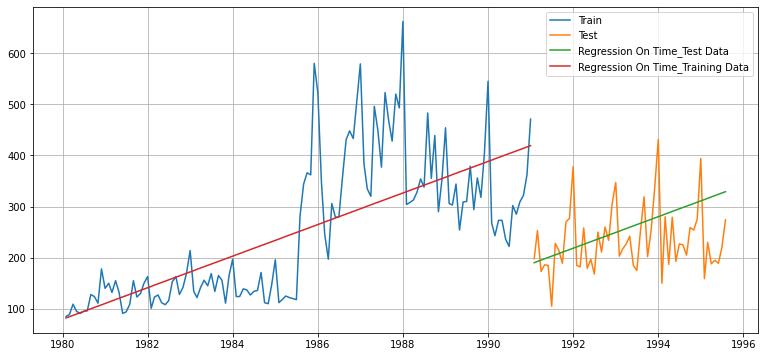

In [58]:
plt.figure(figsize=(13,6))
plt.plot( Train['Shoe_Sales'], label='Train')
plt.plot(Test['Shoe_Sales'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.plot(LinearRegression_train['RegOnTime'], label='Regression On Time_Training Data')
plt.legend(loc='best')
plt.grid();
#plt.savefig('lr-train-test.png')

From the plot we are analysing the Test data:

The orange colored area represents the test data and the green line represents the linear regression values that we have calculated and which cuts the curves almost mean / average of the data.

The average trend is shown between 1992 and 1994. We can observe that, the gap from regression line to upward peak and downward peak which we predicted is high. From this, we can understand that the error is high.

Hence, we can use the Linear Regression model to predict the trend in the timeseries data.

#### performing metrics and model valuation

In [59]:
from sklearn import metrics

In [60]:
## Test Data - RMSE 

rmse_model1_test = metrics.mean_squared_error(Test['Shoe_Sales'],test_predictions_model1,squared=False)
print("Regression On Time forecast on the Test Data: \nRMSE is %3.3f" %(rmse_model1_test))

Regression On Time forecast on the Test Data: 
RMSE is 73.112


In [61]:
results_df = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
results_df

Test RMSE
RegressionOnTime  73.111522

#### Model2: Naive Forecast Model

Naive forecast involves using the previous observation directly as the forecast without any change. 

It is often called the persistence forecast as the prior observation is persisted.

In [62]:
Naive_train = Train.copy()
Naive_test = Test.copy()

In [63]:
Naive_train['naive'] = np.asarray(Train['Shoe_Sales'])[len(np.asarray(Train['Shoe_Sales']))-1]
Naive_train['naive'].head()

Time_Stamp
1980-01-31    471
1980-02-29    471
1980-03-31    471
1980-04-30    471
1980-05-31    471
Name: naive, dtype: int64

In [64]:
Naive_test['naive'] = np.asarray(Train['Shoe_Sales'])[len(np.asarray(Train['Shoe_Sales']))-1]
Naive_test['naive'].head()

Time_Stamp
1991-01-31    471
1991-02-28    471
1991-03-31    471
1991-04-30    471
1991-05-31    471
Name: naive, dtype: int64

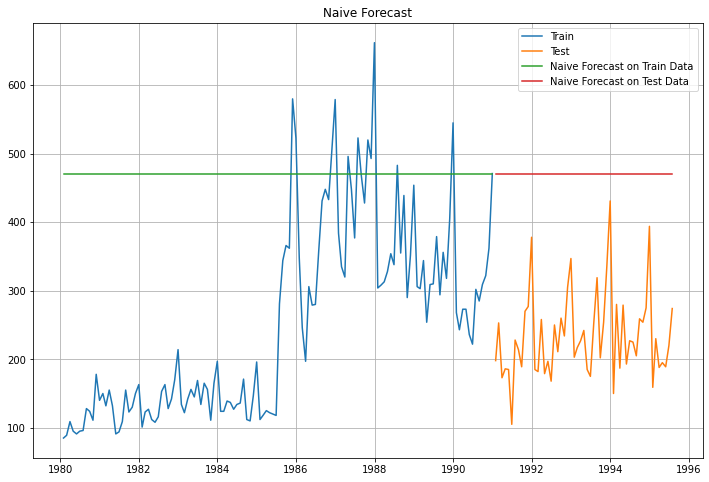

In [65]:
plt.figure(figsize=(12,8))
plt.plot(Naive_train['Shoe_Sales'], label='Train')
plt.plot(Test['Shoe_Sales'], label='Test')
plt.plot(Naive_train['naive'], label='Naive Forecast on Train Data')
plt.plot(Naive_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();
#plt.savefig('Naive-train-test.png')

From the plot we are analysing the Test data:

The orange colored area represents the test data and the red line represents the naive forecast.

The error is very high for predicted values in the test data.

The error in naive model is very high compared to the linear regression model.

We cannot predict the trend in the naive forecast model.

#### performing metrics and model valuation

In [66]:
## Test Data - RMSE 

rmse_model2_test = metrics.mean_squared_error(Test['Shoe_Sales'],Naive_test['naive'],squared=False)
print("Naive Model forecast on the Test Data,\nRMSE is %3.3f" %(rmse_model2_test))

Naive Model forecast on the Test Data,
RMSE is 245.121


In [67]:
results_df2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

results_df = pd.concat([results_df, results_df2])
results_df

Test RMSE
RegressionOnTime   73.111522
NaiveModel        245.121306

In [68]:
# we can observe that the RMSE for Naive model is higher than the Regression model.

#### Model3:Simple Average Model

This model averages the data by months or quarters or years and then calculate the average for the period. Then find out, what percentage it is to the grand average.

In [69]:
#For this particular simple average method, 
#we will forecast by using the average of the training values.

In [70]:
SimpleAverage_train = Train.copy()
SimpleAverage_test = Test.copy()

In [71]:
SimpleAverage_train['mean_forecast'] = Train['Shoe_Sales'].mean()
SimpleAverage_train.head()

Shoe_Sales  mean_forecast
Time_Stamp                           
1980-01-31          85     250.575758
1980-02-29          89     250.575758
1980-03-31         109     250.575758
1980-04-30          95     250.575758
1980-05-31          91     250.575758

In [72]:
SimpleAverage_test['mean_forecast'] = Train['Shoe_Sales'].mean()
SimpleAverage_test.head()

Shoe_Sales  mean_forecast
Time_Stamp                           
1991-01-31         198     250.575758
1991-02-28         253     250.575758
1991-03-31         173     250.575758
1991-04-30         186     250.575758
1991-05-31         185     250.575758

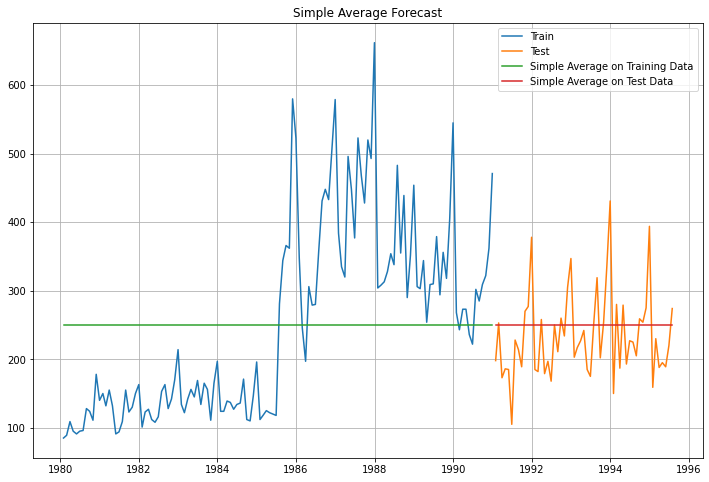

In [73]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Shoe_Sales'], label='Train')
plt.plot(SimpleAverage_test['Shoe_Sales'], label='Test')
plt.plot(SimpleAverage_train['mean_forecast'], label='Simple Average on Training Data')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();
#plt.savefig('SA-train-test.png')

From the plot we are analysing the Test data:

The orange colored area represents the test data.

The red line represents the predicted simple average values which takes the average of the train data and cuts test curve almost near to the mean of the data.

The error is very high for predicted values in the test data.

We can not predict the trend in Simple Average model aslo.

#### performing metrics and model valuation

In [74]:
## Test Data - RMSE 

rmse_model3_test = metrics.mean_squared_error(Test['Shoe_Sales'],SimpleAverage_test['mean_forecast'],squared=False)
print("Simple Average forecast on the Test Data:\nRMSE is %3.3f" %(rmse_model3_test))

Simple Average forecast on the Test Data:
RMSE is 63.985


In [75]:
results_df3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]}
                           ,index=['SimpleAverageModel'])

results_df = pd.concat([results_df, results_df3])
results_df

Test RMSE
RegressionOnTime     73.111522
NaiveModel          245.121306
SimpleAverageModel   63.984570

#### Model4:Moving Average Model

The moving average is a statistical method used for forecasting the long-term trends. We take an average of a set of numbers in a given range while moving the range. The moving average method is used with time-series data to smooth out short-term fluctuations and long-term trends.

We are rolling means or moving averages for different intervals. 

The best interval can be determined by the maximum accuracy or the minimum error.

In [76]:
MovingAverage = df.copy()
MovingAverage.head()

Shoe_Sales
Time_Stamp            
1980-01-31          85
1980-02-29          89
1980-03-31         109
1980-04-30          95
1980-05-31          91

In [77]:
#Trailing moving averages
MovingAverage['Trailing_2'] = MovingAverage['Shoe_Sales'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Shoe_Sales'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Shoe_Sales'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Shoe_Sales'].rolling(9).mean()

MovingAverage.head()

Shoe_Sales  Trailing_2  Trailing_4  Trailing_6  Trailing_9
Time_Stamp                                                            
1980-01-31          85         NaN         NaN         NaN         NaN
1980-02-29          89        87.0         NaN         NaN         NaN
1980-03-31         109        99.0         NaN         NaN         NaN
1980-04-30          95       102.0        94.5         NaN         NaN
1980-05-31          91        93.0        96.0         NaN         NaN

In [78]:
#While performing rolling windows we will get NaN values , so we have to be careful.

The window of the moving average is need to be carefully selected. Because too big a window will result in not having any test set as the whole series might get averaged over.

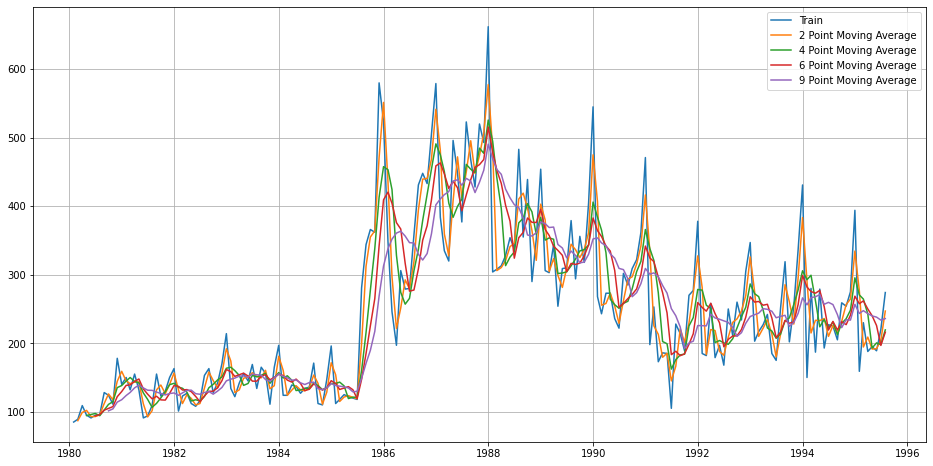

In [79]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Shoe_Sales'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

From the above Moving Average plot, 2 point moving average is almost tracing the original train data. Hence, it'll have less error. when we are increasing the rolling window value like 4 point moving average it got smoothened a bit compared to the 2 point moving average. when we observe 9 point moving average plot the fluctuations are smoothed much compared to 2 point, 4 point, 6 point moving averages. so, as per the increasing year the smoothing would be higher.

In [80]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[0:int(len(MovingAverage)*0.71)] 
trailing_MovingAverage_test=MovingAverage[int(len(MovingAverage)*0.71):]

In [81]:
trailing_MovingAverage_train.tail()

Shoe_Sales  Trailing_2  Trailing_4  Trailing_6  Trailing_9
Time_Stamp                                                            
1990-08-31         285       293.5      261.25  265.166667  294.111111
1990-09-30         309       297.0      279.50  271.166667  267.888889
1990-10-31         322       315.5      304.50  279.333333  273.888889
1990-11-30         362       342.0      319.50  300.333333  287.111111
1990-12-31         471       416.5      366.00  341.833333  309.111111

In [82]:
trailing_MovingAverage_train.head()

Shoe_Sales  Trailing_2  Trailing_4  Trailing_6  Trailing_9
Time_Stamp                                                            
1980-01-31          85         NaN         NaN         NaN         NaN
1980-02-29          89        87.0         NaN         NaN         NaN
1980-03-31         109        99.0         NaN         NaN         NaN
1980-04-30          95       102.0        94.5         NaN         NaN
1980-05-31          91        93.0        96.0         NaN         NaN

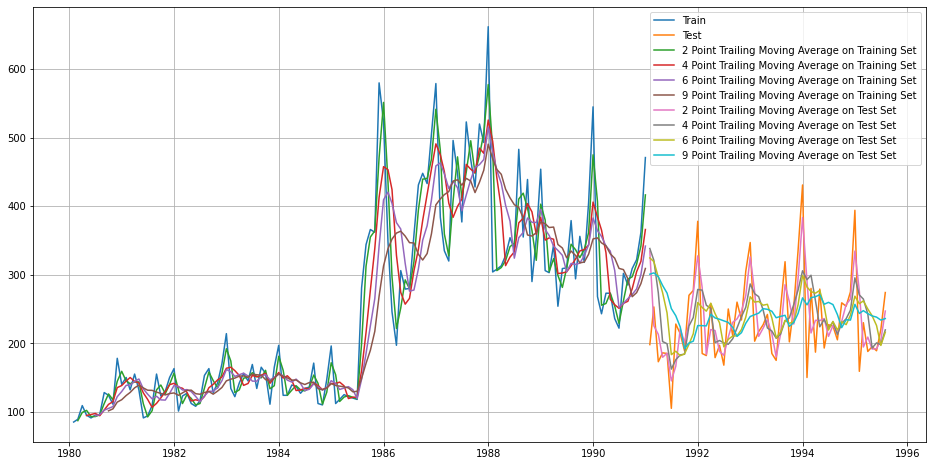

In [83]:
plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Shoe_Sales'], label='Train')
plt.plot(trailing_MovingAverage_test['Shoe_Sales'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'],label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'],label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

we can observe that the 2 point moving average is almost tracing the original data and having minimum error. Hence, Lower the rolling window value less the error, higher the rolling window value higher the error.

#### performing metrics and model evaluation (for the test data)

In [84]:
## Test Data - RMSE  --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(Test['Shoe_Sales'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("2 point Moving Average Model forecast on the Testing Data:\nRMSE is %3.3f" %(rmse_model4_test_2))


## Test Data - RMSE --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(Test['Shoe_Sales'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("4 point Moving Average Model forecast on the Testing Data:\nRMSE is %3.3f" %(rmse_model4_test_4))


## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(Test['Shoe_Sales'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("6 point Moving Average Model forecast on the Testing Data:\nRMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE  --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(Test['Shoe_Sales'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("9 point Moving Average Model forecast on the Testing Data:\nRMSE is %3.3f" %(rmse_model4_test_9))

2 point Moving Average Model forecast on the Testing Data:
RMSE is 45.949
4 point Moving Average Model forecast on the Testing Data:
RMSE is 57.873
6 point Moving Average Model forecast on the Testing Data:
RMSE is 63.457
9 point Moving Average Model forecast on the Testing Data:
RMSE is 67.724


In [85]:
results_df4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

results_df = pd.concat([results_df, results_df4])
results_df

Test RMSE
RegressionOnTime              73.111522
NaiveModel                   245.121306
SimpleAverageModel            63.984570
2pointTrailingMovingAverage   45.948736
4pointTrailingMovingAverage   57.872686
6pointTrailingMovingAverage   63.456893
9pointTrailingMovingAverage   67.723648

In [86]:
#2 point moving average is having very less RMSE value compared to all the models.

Before we go on to build the various Exponential Smoothing models, let us plot all the models and compare the Time Series plots.

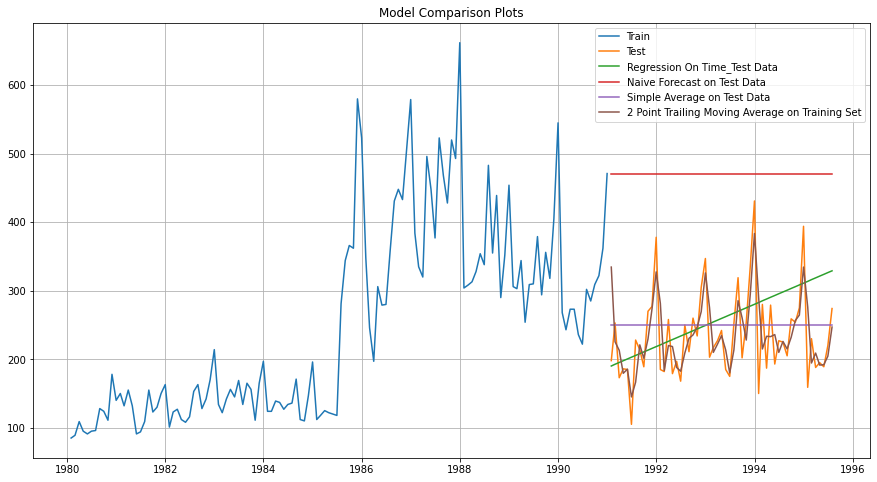

In [88]:
## Plotting on both Training and Test data

#plt.figure(figsize=(30,12))
plt.plot(Train['Shoe_Sales'], label='Train')
plt.plot(Test['Shoe_Sales'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.plot(Naive_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

From the plot, we can observe that the 2 point moving average model having the least error.

#### Model5:Simple Exponential Smoothing (automated)

Simple Exponential Smoothing is a time series forecasting method  used for univariate data without a trend or seasonality. 

It requires a single parameter, called alpha (a), which is also called the smoothing factor or smoothing coefficient.

In [89]:
import warnings
warnings.filterwarnings('ignore')

In [90]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [91]:
SES_train = Train.copy()
SES_test = Test.copy()

In [92]:
model_SES = SimpleExpSmoothing(SES_train['Shoe_Sales'])

In [93]:
model_SES_autofit = model_SES.fit(optimized=True,use_brute=True)

In [94]:
print(model_SES_autofit.summary())

                       SimpleExpSmoothing Model Results                       
Dep. Variable:             Shoe_Sales   No. Observations:                  132
Model:             SimpleExpSmoothing   SSE                         682402.272
Optimized:                       True   AIC                           1132.676
Trend:                           None   BIC                           1138.441
Seasonal:                        None   AICC                          1132.991
Seasonal Periods:                None   Date:                 Sun, 03 Apr 2022
Box-Cox:                        False   Time:                         18:38:42
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.6050493                alpha                 True
initial_level              88.829371                

In [95]:
model_SES_autofit.params

{'smoothing_level': 0.60504929557062,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 88.82937100904118,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

we get the optimised parameters by using the autofit. smoothing level is alpha, smoothing trend is beta and smoothing seasonal is gamma.

we dont consider the trend and seasonal it is showing as nan because we are now using the simple exponential smoothing. 

As It requires a single parameter, called alpha (a), which is also called the smoothing factor or smoothing coefficient.

In [96]:
SES_train['predict'] = model_SES_autofit.fittedvalues
SES_train.head()

Shoe_Sales     predict
Time_Stamp                        
1980-01-31          85   88.829371
1980-02-29          89   86.512413
1980-03-31         109   88.017526
1980-04-30          95  100.712957
1980-05-31          91   97.256336

In [97]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(SES_test))
SES_test.head()

Shoe_Sales     predict
Time_Stamp                        
1991-01-31         198  420.229868
1991-02-28         253  420.229868
1991-03-31         173  420.229868
1991-04-30         186  420.229868
1991-05-31         185  420.229868

In [98]:
#For prediction, we need to use autofit.forecast for the steps of length of the test data 
#so that we can produce as many forcasted values as the length of the test data.

Text(0.5, 1.0, 'Alpha =0.605 Predictions')

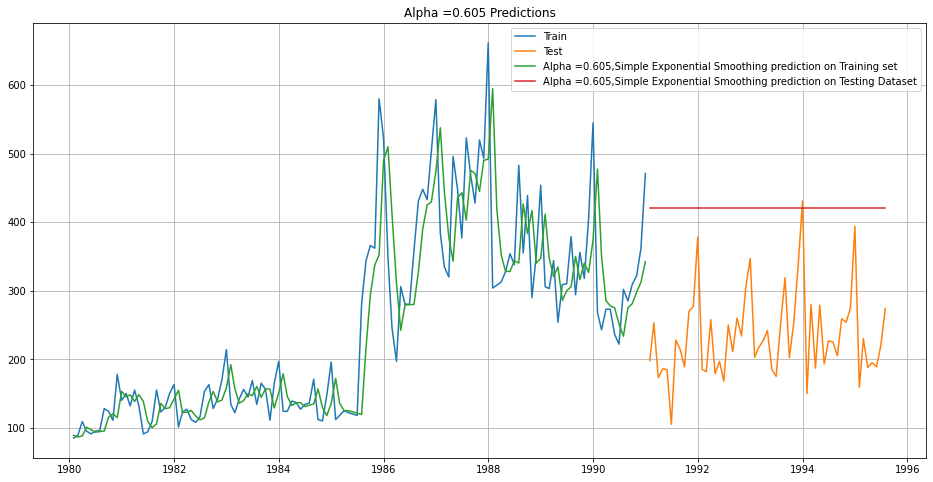

In [99]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Shoe_Sales'], label='Train')
plt.plot(SES_test['Shoe_Sales'], label='Test')

plt.plot(SES_train['predict'], label='Alpha =0.605,Simple Exponential Smoothing prediction on Training set')
plt.plot(SES_test['predict'], label='Alpha =0.605,Simple Exponential Smoothing prediction on Testing Dataset')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.605 Predictions')

#### performing metrics and model evaluation (for the test data)

In [100]:
## Test Data --RMSE

rmse_model5_test = metrics.mean_squared_error(SES_test['Shoe_Sales'],SES_test['predict'],squared=False)
print("Alpha =0.605 Simple Exponential Smoothing Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model5_test))


Alpha =0.605 Simple Exponential Smoothing Model forecast on the Training Data,  RMSE is 196.405


In [101]:
results_df5 = pd.DataFrame({'Test RMSE': [rmse_model5_test]}
                           ,index=['Alpha=0,SimpleExponentialSmoothing'])

results_df = pd.concat([results_df, results_df5])
results_df

Test RMSE
RegressionOnTime                     73.111522
NaiveModel                          245.121306
SimpleAverageModel                   63.984570
2pointTrailingMovingAverage          45.948736
4pointTrailingMovingAverage          57.872686
6pointTrailingMovingAverage          63.456893
9pointTrailingMovingAverage          67.723648
Alpha=0,SimpleExponentialSmoothing  196.404847

In [102]:
#Setting different alpha values.

The higher the alpha value more weightage is given to the more recent observation. That means, what happened recently will happen again.

#### Model6:Simple Exponential Model with alpha in range of 0.1 to 0.1

In [103]:
## First we will define an empty dataframe to store our values from the loop
results_df6_model = pd.DataFrame({'Alpha Values':[],'Test RMSE': []})
results_df6_model

Empty DataFrame
Columns: [Alpha Values, Test RMSE]
Index: []

In [104]:
for i in np.arange(0.1,1.0,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=True,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=len(SES_test))
    
    rmse_model6_train_i = metrics.mean_squared_error(SES_train['Shoe_Sales'],SES_train['predict',i],squared=False)
    
    rmse_model6_test_i = metrics.mean_squared_error(SES_test['Shoe_Sales'],SES_test['predict',i],squared=False)
    
    
    results_df6_model = results_df6_model.append({'Alpha Values':i,'Train RMSE':rmse_model6_train_i 
                                      ,'Test RMSE':rmse_model6_test_i}, ignore_index=True)

In [105]:
# we are manually giving alpha values in a range and while fitting the model range is given for smoothing level.

# Hence, we are not asking model to give us optimized value. 

# we keep it as false and we us brute force method. 

# while performing metrics we keep squared as false since by default it takes as true
#and wil give us MSE value instead of RMSE as we are using mean squared error.

In [106]:
results_df6_model

Alpha Values   Test RMSE  Train RMSE
0           0.1  115.874466   84.870519
1           0.2  124.976820   77.171203
2           0.3  143.400350   74.544186
3           0.4  162.553211   73.058312
4           0.5  180.072484   72.198579
5           0.6  195.663327   71.901396
6           0.7  209.658339   72.131315
7           0.8  222.417584   72.846836
8           0.9  234.188166   74.023411

In [107]:
 results_df6_model.sort_values(by=['Test RMSE'], ascending=True)

Alpha Values   Test RMSE  Train RMSE
0           0.1  115.874466   84.870519
1           0.2  124.976820   77.171203
2           0.3  143.400350   74.544186
3           0.4  162.553211   73.058312
4           0.5  180.072484   72.198579
5           0.6  195.663327   71.901396
6           0.7  209.658339   72.131315
7           0.8  222.417584   72.846836
8           0.9  234.188166   74.023411

After sorting the values with respect to test RMSE, I'm choosing alpha with 0.1 since it is having low RMSE 115.874466.

In [108]:
model_SES_s = SimpleExpSmoothing(SES_train['Shoe_Sales'])
model_SES_s_autofit = model_SES.fit(smoothing_level=0.1, optimized=True,use_brute=True)

In [109]:
print(model_SES_s_autofit.summary())

                       SimpleExpSmoothing Model Results                       
Dep. Variable:             Shoe_Sales   No. Observations:                  132
Model:             SimpleExpSmoothing   SSE                         950796.654
Optimized:                       True   AIC                           1176.457
Trend:                           None   BIC                           1182.223
Seasonal:                        None   AICC                          1176.772
Seasonal Periods:                None   Date:                 Sun, 03 Apr 2022
Box-Cox:                        False   Time:                         18:38:47
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.1000000                alpha                False
initial_level              112.84699                

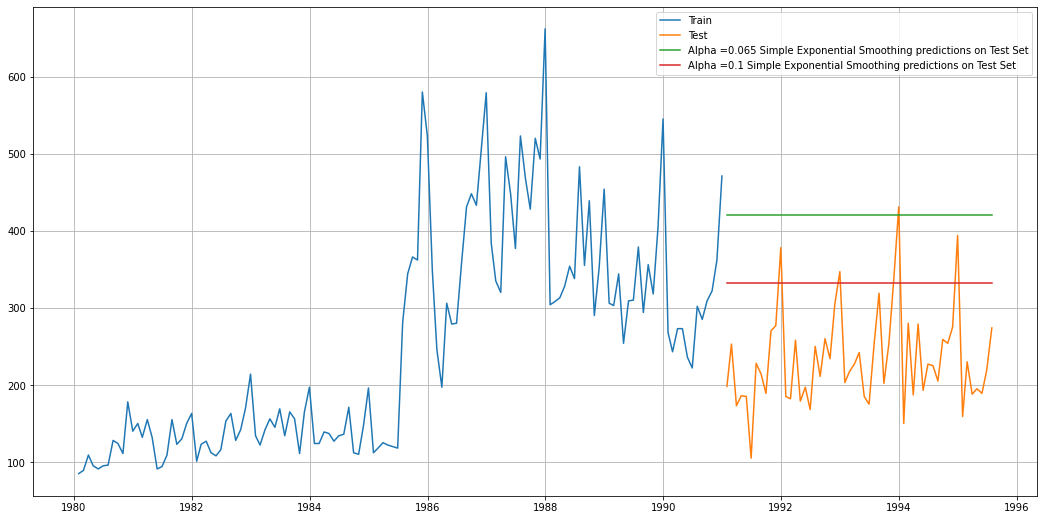

In [110]:
## Plotting on both the Training and Test data for top values of alpha

plt.figure(figsize=(18,9))
plt.plot(SES_train['Shoe_Sales'], label='Train')
plt.plot(SES_test['Shoe_Sales'], label='Test')

#plt.plot(SES_train['predict'], label='Alpha =0.065 Simple Exponential Smoothing predictions on Training Set')
plt.plot(SES_test['predict'], label='Alpha =0.065 Simple Exponential Smoothing predictions on Test Set')

#plt.plot(SES_train['predict', 0.1], label='Alpha =0.1imple Exponential Smoothing predictions on Training Set')
plt.plot(SES_test['predict', 0.1], label='Alpha =0.1 Simple Exponential Smoothing predictions on Test Set')



plt.legend(loc='best')
plt.grid();

In [111]:
# alpha = 0.1 having less error but it is not having any trend or seasonality

In [112]:
results_df6 = pd.DataFrame({'Test RMSE': [results_df6_model['Test RMSE'][0]]}
                           ,index=['Alpha=0.1,SimpleExponentialSmoothing'])

results_df = pd.concat([results_df,results_df6 ])
results_df

Test RMSE
RegressionOnTime                       73.111522
NaiveModel                            245.121306
SimpleAverageModel                     63.984570
2pointTrailingMovingAverage            45.948736
4pointTrailingMovingAverage            57.872686
6pointTrailingMovingAverage            63.456893
9pointTrailingMovingAverage            67.723648
Alpha=0,SimpleExponentialSmoothing    196.404847
Alpha=0.1,SimpleExponentialSmoothing  115.874466

#### Model7: Double Exponential Smoothing

Double Exponential Smoothing is an extension to Exponential Smoothing that explicitly adds support for trends in the univariate time series.

Including the alpha($\alpha$) parameter for controlling smoothing factor for the level, an additional smoothing factor is added to control the decay of the influence of the change in trend called beta ($\beta$).

Two parameters $\alpha$ and $\beta$ are estimated in this model. Level and Trend are accounted for in this model.

In [113]:
DES_train = Train.copy()
DES_test = Test.copy()

In [114]:
model_DES = Holt(DES_train['Shoe_Sales'])

#we are using Holt method where we consider smoothing level and trend but not seasonality that is alpha and beta respectively.

In [115]:
model_DES_autofit = model_DES.fit(optimized=True,use_brute=True)

In [116]:
print(model_DES_autofit.summary())

                              Holt Model Results                              
Dep. Variable:             Shoe_Sales   No. Observations:                  132
Model:                           Holt   SSE                         680501.962
Optimized:                       True   AIC                           1136.307
Trend:                       Additive   BIC                           1147.839
Seasonal:                        None   AICC                          1136.979
Seasonal Periods:                None   Date:                 Sun, 03 Apr 2022
Box-Cox:                        False   Time:                         18:38:49
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.5982578                alpha                 True
smoothing_trend            0.0006281                

In [117]:
model_DES_autofit.params_formatted

name      param  optimized
smoothing_level  alpha   0.598258       True
smoothing_trend   beta   0.000628       True
initial_level      l.0  84.982346       True
initial_trend      b.0   2.547437       True

In [118]:
# predictions on training data
DES_train['predict',0.59,0.0] = model_DES_autofit.fittedvalues
DES_train.head()

Shoe_Sales  (predict, 0.59, 0.0)
Time_Stamp                                  
1980-01-31          85             87.529783
1980-02-29          89             88.562807
1980-03-31         109             91.371011
1980-04-30          95            104.470966
1980-05-31          91            101.354602

In [119]:
DES_test['predict',0.59,0.0] = model_DES_autofit.forecast(steps=len(DES_test))
DES_test.head()

Shoe_Sales  (predict, 0.59, 0.0)
Time_Stamp                                  
1991-01-31         198            423.398462
1991-02-28         253            425.945842
1991-03-31         173            428.493222
1991-04-30         186            431.040601
1991-05-31         185            433.587981

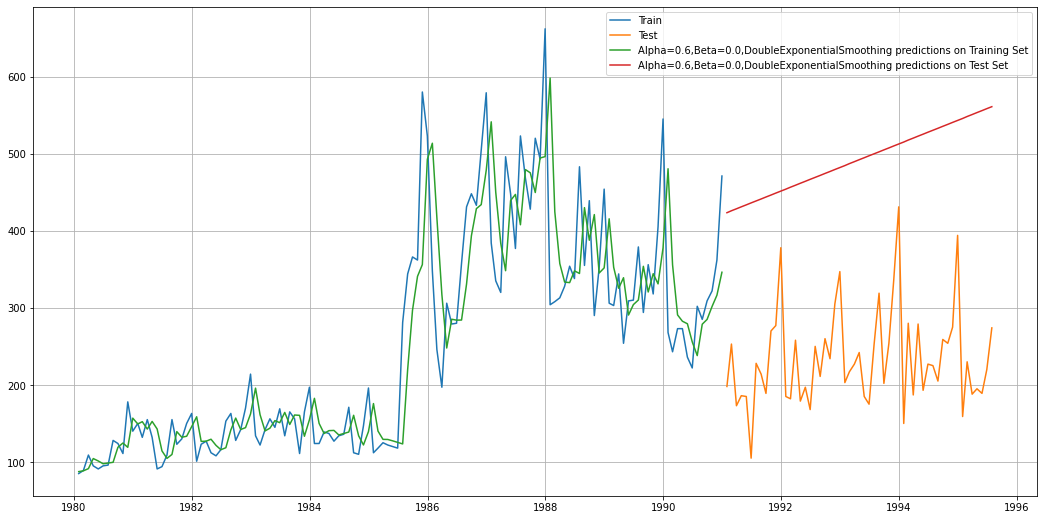

In [120]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['Shoe_Sales'], label='Train')
plt.plot(DES_test['Shoe_Sales'], label='Test')

plt.plot(DES_train['predict', 0.59, 0.0], label='Alpha=0.6,Beta=0.0,DoubleExponentialSmoothing predictions on Training Set')
plt.plot(DES_test['predict', 0.59, 0.0], label='Alpha=0.6,Beta=0.0,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [121]:
## Test Data --RMSE

rmse_model7_test = metrics.mean_squared_error(DES_test['Shoe_Sales'],DES_test['predict',0.59,0.0],squared=False)
print("Alpha=0.59 and Beta=0 Double Exponential Smoothing Model forecast on the Testing Data,  RMSE is %3.3f" %(rmse_model7_test))


Alpha=0.59 and Beta=0 Double Exponential Smoothing Model forecast on the Testing Data,  RMSE is 267.252


In [122]:
results_df7 = pd.DataFrame({'Test RMSE': [rmse_model7_test]}
                           ,index=['Alpha=0.59 and Beta=0,DoubleExponentialSmoothing'])

results_df = pd.concat([results_df, results_df7])
results_df

Test RMSE
RegressionOnTime                                   73.111522
NaiveModel                                        245.121306
SimpleAverageModel                                 63.984570
2pointTrailingMovingAverage                        45.948736
4pointTrailingMovingAverage                        57.872686
6pointTrailingMovingAverage                        63.456893
9pointTrailingMovingAverage                        67.723648
Alpha=0,SimpleExponentialSmoothing                196.404847
Alpha=0.1,SimpleExponentialSmoothing              115.874466
Alpha=0.59 and Beta=0,DoubleExponentialSmoothing  267.251583

#### Model8:Simple Exponential Model with alpha in range of 0.1 to 0.1

In [123]:
DES_train_d = Train.copy()
DES_test_d = Test.copy()

In [124]:
model_DES_d = Holt(DES_train_d['Shoe_Sales'])

In [125]:
## First we will define an empty dataframe to store our values from the loop

results_df_d = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[]
                                ,'Test RMSE': []})
results_df_d

Empty DataFrame
Columns: [Alpha Values, Beta Values, Train RMSE, Test RMSE]
Index: []

In [126]:
for i in np.arange(0.1,1.0,0.1):
    for j in np.arange(0.1,0.9,0.1):
        model_DES_d_alpha_i_beta_j = model_DES_d.fit(smoothing_level=i,smoothing_slope=j,optimized=True,use_brute=True)
        DES_train_d['predict',i,j] = model_DES_d_alpha_i_beta_j.fittedvalues
        DES_test_d['predict',i,j] = model_DES_d_alpha_i_beta_j.forecast(steps=len(DES_test_d))
        
        rmse_model8_train = metrics.mean_squared_error(DES_train_d['Shoe_Sales'],DES_train_d['predict',i,j],squared=False)
        
        rmse_model8_test = metrics.mean_squared_error(DES_test_d['Shoe_Sales'],DES_test_d['predict',i,j],squared=False)
        
        results_df_d = results_df_d.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model8_train
                                      ,'Test RMSE':rmse_model8_test}, ignore_index=True)

In [127]:
results_df_d

Alpha Values  Beta Values  Train RMSE    Test RMSE
0            0.1          0.1   86.606563    76.884339
1            0.1          0.2   84.427567   209.883100
2            0.1          0.3   84.183322   225.100422
3            0.1          0.4   86.094141   229.327873
4            0.1          0.5   89.216108   233.703281
..           ...          ...         ...          ...
67           0.9          0.4   86.230317  1968.501627
68           0.9          0.5   89.412136  2274.500265
69           0.9          0.6   92.802125  2555.018707
70           0.9          0.7   96.422783  2821.724663
71           0.9          0.8  100.280707  3077.279937

[72 rows x 4 columns]

In [128]:
results_df_d.sort_values(by=['Test RMSE'], ascending=True)

Alpha Values  Beta Values  Train RMSE    Test RMSE
0            0.1          0.1   86.606563    76.884339
8            0.2          0.1   79.155470   163.808760
1            0.1          0.2   84.427567   209.883100
2            0.1          0.3   84.183322   225.100422
3            0.1          0.4   86.094141   229.327873
..           ...          ...         ...          ...
62           0.8          0.7   91.971921  2645.253070
55           0.7          0.8   91.120054  2663.039985
70           0.9          0.7   96.422783  2821.724663
63           0.8          0.8   95.113247  2889.230467
71           0.9          0.8  100.280707  3077.279937

[72 rows x 4 columns]

After sorting values I'm choosing alpha = 0.1 and beta = 0.1 since it is having low test RMSE.

In [129]:
model_DES_d = Holt(DES_train_d['Shoe_Sales'])
Holt_model_results = model_DES_d.fit(smoothing_level=0.1,smoothing_slope=0.1,optimized=True,use_brute=True)

In [130]:
print(Holt_model_results.summary())

                              Holt Model Results                              
Dep. Variable:             Shoe_Sales   No. Observations:                  132
Model:                           Holt   SSE                         990091.973
Optimized:                       True   AIC                           1185.803
Trend:                       Additive   BIC                           1197.334
Seasonal:                        None   AICC                          1186.475
Seasonal Periods:                None   Date:                 Sun, 03 Apr 2022
Box-Cox:                        False   Time:                         18:38:53
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.1000000                alpha                False
smoothing_trend            0.1000000                

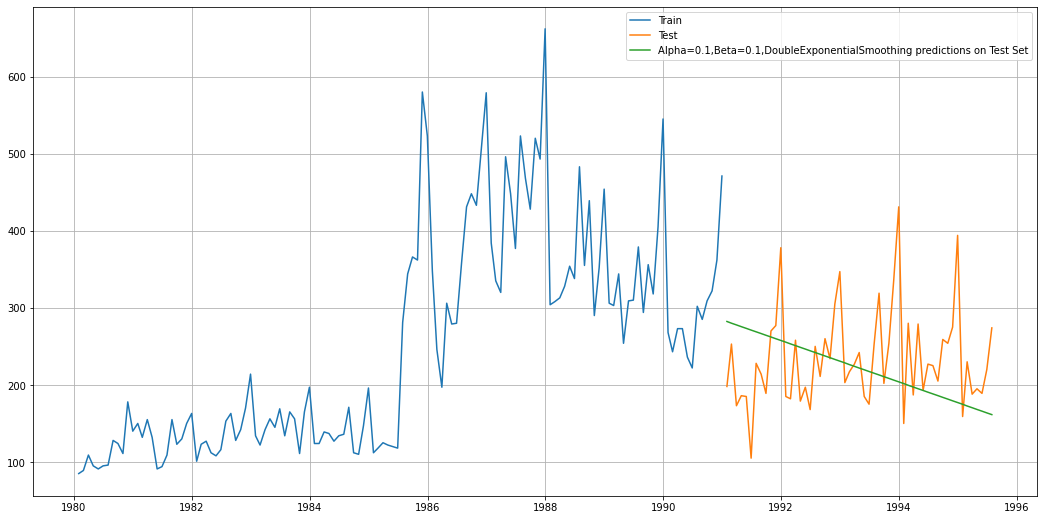

In [131]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train_d['Shoe_Sales'], label='Train')
plt.plot(DES_test_d['Shoe_Sales'], label='Test')

plt.plot(DES_test_d['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [132]:
results_df8 = pd.DataFrame({'Test RMSE': [results_df_d['Test RMSE'][0]]}
                           ,index=['Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing'])

results_df = pd.concat([results_df, results_df8])
results_df

Test RMSE
RegressionOnTime                                   73.111522
NaiveModel                                        245.121306
SimpleAverageModel                                 63.984570
2pointTrailingMovingAverage                        45.948736
4pointTrailingMovingAverage                        57.872686
6pointTrailingMovingAverage                        63.456893
9pointTrailingMovingAverage                        67.723648
Alpha=0,SimpleExponentialSmoothing                196.404847
Alpha=0.1,SimpleExponentialSmoothing              115.874466
Alpha=0.59 and Beta=0,DoubleExponentialSmoothing  267.251583
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing      76.884339

#### Model:9 Triple Exponential Smoothing

Triple Exponential Smoothing is an extension of Exponential Smoothing that explicitly adds support for seasonality to the univariate time series.

This method is also called Holt-Winters Exponential Smoothing.

In addition to the alpha and beta smoothing factors, a new parameter is added called gamma (g) that controls the influence on the seasonal component.

In [133]:
TES_train = Train.copy()
TES_test = Test.copy()

In [134]:
model_TES = ExponentialSmoothing(TES_train['Shoe_Sales'], freq='M', trend='additive',seasonal='multiplicative')

In [135]:
model_TES_autofit = model_TES.fit(optimized=True,use_brute=True)

In [136]:
model_TES_autofit.params

{'smoothing_level': 0.5355789211755425,
 'smoothing_trend': 0.0005989974704412877,
 'smoothing_seasonal': 0.24421956531721212,
 'damping_trend': nan,
 'initial_level': 210.49455796111337,
 'initial_trend': 1.0641531153308956,
 'initial_seasons': array([0.51446756, 0.47849783, 0.60495344, 0.66658425, 0.57530128,
        0.51581614, 0.55731175, 0.75364195, 0.82116511, 0.69364706,
        0.85108384, 0.85085833]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [137]:
print(model_TES_autofit.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:               Shoe_Sales   No. Observations:                  132
Model:             ExponentialSmoothing   SSE                         297665.163
Optimized:                         True   AIC                           1051.162
Trend:                         Additive   BIC                           1097.287
Seasonal:                Multiplicative   AICC                          1057.215
Seasonal Periods:                    12   Date:                 Sun, 03 Apr 2022
Box-Cox:                          False   Time:                         18:38:54
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.5355789                alpha                 True
smoothing_trend          

In [138]:
## Prediction on the training data

TES_train['auto_predict'] = model_TES_autofit.fittedvalues
TES_train.head()

Shoe_Sales  auto_predict
Time_Stamp                          
1980-01-31          85    108.840094
1980-02-29          89     89.856925
1980-03-31         109    113.658157
1980-04-30          95    123.185737
1980-05-31          91     93.882150

In [139]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(TES_test))
TES_test.head()

Shoe_Sales  auto_predict
Time_Stamp                          
1991-01-31         198    261.204815
1991-02-28         253    245.321919
1991-03-31         173    261.538070
1991-04-30         186    272.150881
1991-05-31         185    270.396132

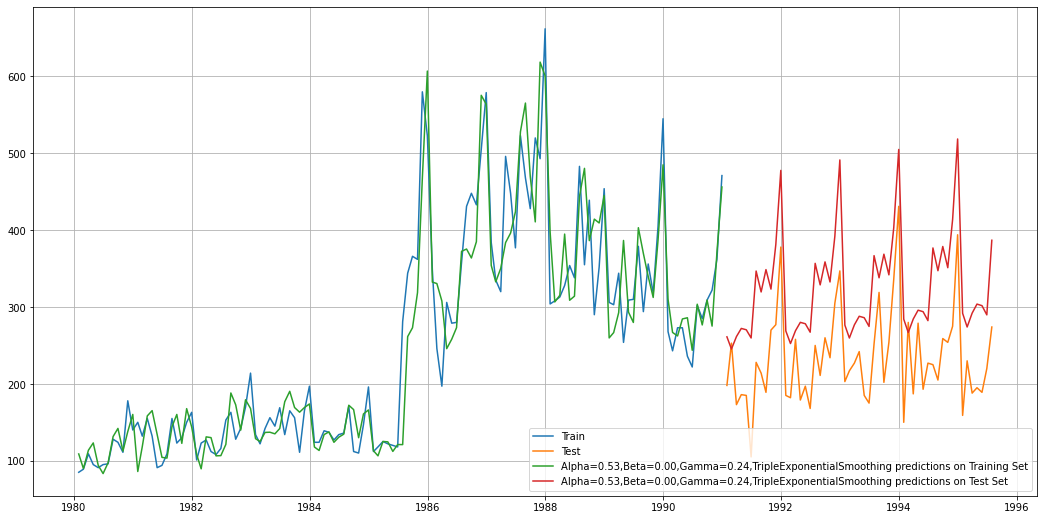

In [140]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['Shoe_Sales'], label='Train')
plt.plot(TES_test['Shoe_Sales'], label='Test')

plt.plot(TES_train['auto_predict'], label='Alpha=0.53,Beta=0.00,Gamma=0.24,TripleExponentialSmoothing predictions on Training Set')
plt.plot(TES_test['auto_predict'], label='Alpha=0.53,Beta=0.00,Gamma=0.24,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [141]:
## Test Data --RMSE

rmse_model9_test = metrics.mean_squared_error(TES_test['Shoe_Sales'],TES_test['auto_predict'],squared=False)
print("Alpha=0.53,Beta=0.00,Gamma=0.24, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f " %(rmse_model9_test))

Alpha=0.53,Beta=0.00,Gamma=0.24, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 99.428 


In [142]:
results_df9 = pd.DataFrame({'Test RMSE': [rmse_model9_test]}
                           ,index=['Alpha: 0.112,Beta: 0.037 and Gamma:0.493,TripleExponentialSmoothing'])

results_df = pd.concat([results_df, results_df9])
results_df

Test RMSE
RegressionOnTime                                     73.111522
NaiveModel                                          245.121306
SimpleAverageModel                                   63.984570
2pointTrailingMovingAverage                          45.948736
4pointTrailingMovingAverage                          57.872686
6pointTrailingMovingAverage                          63.456893
9pointTrailingMovingAverage                          67.723648
Alpha=0,SimpleExponentialSmoothing                  196.404847
Alpha=0.1,SimpleExponentialSmoothing                115.874466
Alpha=0.59 and Beta=0,DoubleExponentialSmoothing    267.251583
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing        76.884339
Alpha: 0.112,Beta: 0.037 and Gamma:0.493,Triple...   99.428217

#### Model10:Triple Exponential Smoothing in range 0.1 to 0.1

In [143]:
## First we will define an empty dataframe to store our values from the loop

results_df_t = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[]
                                ,'Test RMSE': []})
results_df_t

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE]
Index: []

In [144]:
TES_train_t = Train.copy()
TES_test_t = Test.copy()

In [145]:
for i in np.arange(0.1,1.0,0.1):
    for j in np.arange(0.1,1.0,0.1):
        for k in np.arange(0.1,1.0,0.1):
            model_TES_t_alpha_i_beta_j_gamma_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=True,use_brute=True)
            TES_train_t['predict',i,j,k] = model_TES_t_alpha_i_beta_j_gamma_k.fittedvalues
            TES_test_t['predict',i,j,k] = model_TES_t_alpha_i_beta_j_gamma_k.forecast(steps=len(TES_test_t))
        
            rmse_model10_train = metrics.mean_squared_error(TES_train_t['Shoe_Sales'],TES_train_t['predict',i,j,k],squared=False)
        
            rmse_model10_test = metrics.mean_squared_error(TES_test_t['Shoe_Sales'],TES_test_t['predict',i,j,k],squared=False)
        
            results_df_t = results_df_t.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,'Train RMSE':rmse_model10_train
                                      ,'Test RMSE':rmse_model10_test}, ignore_index=True)

In [146]:
results_df_t

Alpha Values  Beta Values  Gamma Values    Train RMSE      Test RMSE
0             0.1          0.1           0.1     66.570081     110.606633
1             0.1          0.1           0.2     68.178916     102.746782
2             0.1          0.1           0.3     70.479206      96.681477
3             0.1          0.1           0.4     73.139131      89.319898
4             0.1          0.1           0.5     76.176212      81.834284
..            ...          ...           ...           ...            ...
724           0.9          0.9           0.5   1749.282790   56085.115106
725           0.9          0.9           0.6  77336.149374   53832.609720
726           0.9          0.9           0.7  11567.988359  262323.247591
727           0.9          0.9           0.8  14888.828096     907.105861
728           0.9          0.9           0.9   8790.553474    8559.433308

[729 rows x 5 columns]

In [147]:
results_df_t.sort_values(by=['Test RMSE'], ascending=True)

Alpha Values  Beta Values  Gamma Values    Train RMSE     Test RMSE
46            0.1          0.6           0.2  7.206017e+01  4.131490e+01
40            0.1          0.5           0.5  9.340528e+01  4.384285e+01
34            0.1          0.4           0.8  1.190352e+02  4.513769e+01
93            0.2          0.2           0.4  6.627422e+01  4.700507e+01
10            0.1          0.2           0.2  6.535062e+01  4.720283e+01
..            ...          ...           ...           ...           ...
638           0.8          0.8           0.9  1.326806e+04  3.109094e+06
319           0.4          0.9           0.5  3.602118e+05  3.157562e+06
146           0.2          0.8           0.3  7.683824e+04  4.415493e+06
276           0.4          0.4           0.7  6.651619e+10  5.136528e+06
78            0.1          0.9           0.7  2.146187e+15  1.456081e+07

[729 rows x 5 columns]

After sorting the values with respect to low RMSE value I'm choosing alha = 0.1, beta = 0.6, gamma = 0.2.

In [148]:
model_TES_t = ExponentialSmoothing(TES_train_t['Shoe_Sales'], freq='M', trend='additive',seasonal='multiplicative')
model_TES_t_autofit = model_TES_t.fit(smoothing_level=0.1,smoothing_slope=0.6,smoothing_seasonal=0.2,optimized=True,use_brute=True)

In [149]:
print(model_TES_t_autofit.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:               Shoe_Sales   No. Observations:                  132
Model:             ExponentialSmoothing   SSE                         685432.249
Optimized:                         True   AIC                           1161.260
Trend:                         Additive   BIC                           1207.385
Seasonal:                Multiplicative   AICC                          1167.313
Seasonal Periods:                    12   Date:                 Sun, 03 Apr 2022
Box-Cox:                          False   Time:                         18:39:18
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.1000000                alpha                False
smoothing_trend          

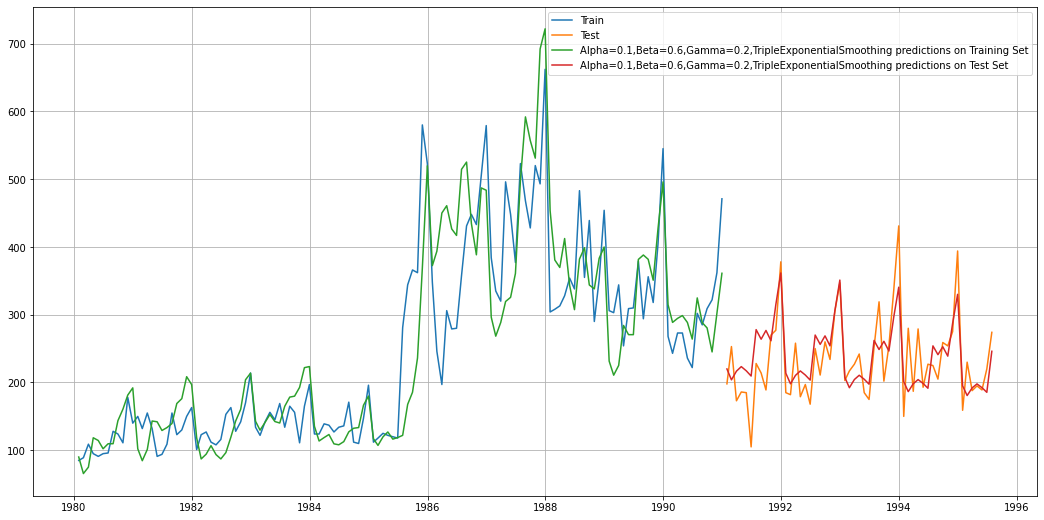

In [150]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train_t['Shoe_Sales'], label='Train')
plt.plot(TES_test_t['Shoe_Sales'], label='Test')

plt.plot(TES_train_t['predict', 0.1, 0.6, 0.2], label='Alpha=0.1,Beta=0.6,Gamma=0.2,TripleExponentialSmoothing predictions on Training Set')
plt.plot(TES_test_t['predict', 0.1, 0.6, 0.2], label='Alpha=0.1,Beta=0.6,Gamma=0.2,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

With the brute force method for triple exponential smoothing we got less error and tracing same as original test data compared to triple exponential smoothing with optimized values.

In [151]:
results_df10 = pd.DataFrame({'Test RMSE': [results_df_t.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=0.1,Beta=0.6,Gamma=0.2,TripleExponentialSmoothing'])
results_df = pd.concat([results_df, results_df10])
results_df

Test RMSE
RegressionOnTime                                     73.111522
NaiveModel                                          245.121306
SimpleAverageModel                                   63.984570
2pointTrailingMovingAverage                          45.948736
4pointTrailingMovingAverage                          57.872686
6pointTrailingMovingAverage                          63.456893
9pointTrailingMovingAverage                          67.723648
Alpha=0,SimpleExponentialSmoothing                  196.404847
Alpha=0.1,SimpleExponentialSmoothing                115.874466
Alpha=0.59 and Beta=0,DoubleExponentialSmoothing    267.251583
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing        76.884339
Alpha: 0.112,Beta: 0.037 and Gamma:0.493,Triple...   99.428217
Alpha=0.1,Beta=0.6,Gamma=0.2,TripleExponentialS...   41.314898

In [152]:
print('Sorted by RMSE values on the Test Data:','\n',)
results_df.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



Test RMSE
Alpha=0.1,Beta=0.6,Gamma=0.2,TripleExponentialS...   41.314898
2pointTrailingMovingAverage                          45.948736
4pointTrailingMovingAverage                          57.872686
6pointTrailingMovingAverage                          63.456893
SimpleAverageModel                                   63.984570
9pointTrailingMovingAverage                          67.723648
RegressionOnTime                                     73.111522
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing        76.884339
Alpha: 0.112,Beta: 0.037 and Gamma:0.493,Triple...   99.428217
Alpha=0.1,SimpleExponentialSmoothing                115.874466
Alpha=0,SimpleExponentialSmoothing                  196.404847
NaiveModel                                          245.121306
Alpha=0.59 and Beta=0,DoubleExponentialSmoothing    267.251583

We can now see that the best optimized model is the Triple Exponential Smoothing with multiplicative seasonality with the parameters $\alpha$ = 0.1, $\beta$ = 0.6 and $\gamma$ = 0.2.

The Triple exponential model is having both the trend and seasonality, It can work better compared to the other models.

**For the purpose of better understanding we are performing all the models and comparing them with respect to the RMSE values.**

Before moving to the ARIMA models,  let us plot all the models and compare the Time Series plots.

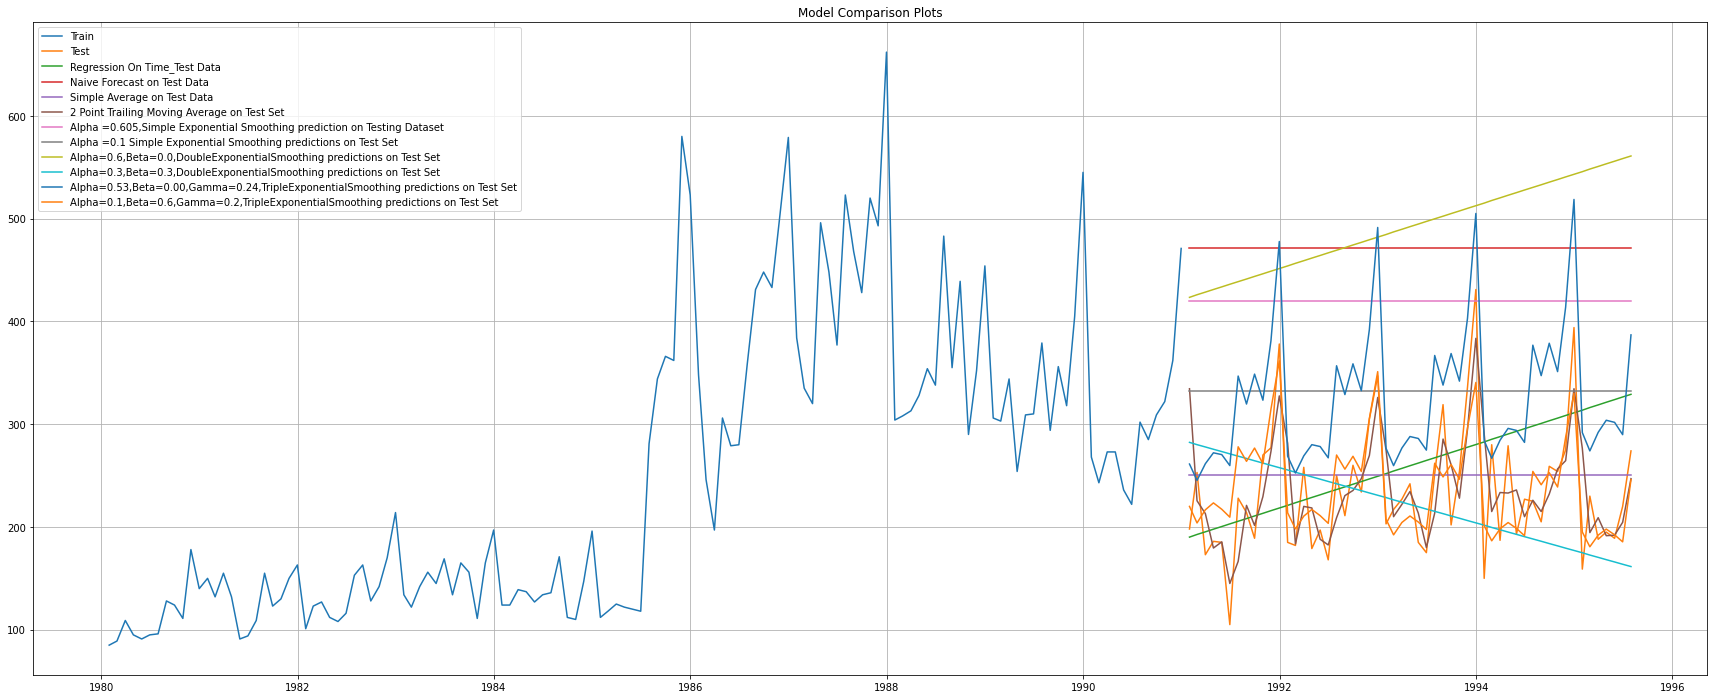

In [153]:
plt.figure(figsize=(30,12))
plt.plot(Train['Shoe_Sales'], label='Train')
plt.plot(Test['Shoe_Sales'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.plot(Naive_test['naive'], label='Naive Forecast on Test Data')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.plot(trailing_MovingAverage_test['Trailing_2'],label='2 Point Trailing Moving Average on Test Set')
plt.plot(SES_test['predict'], label='Alpha =0.605,Simple Exponential Smoothing prediction on Testing Dataset')
plt.plot(SES_test['predict', 0.1], label='Alpha =0.1 Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_test['predict', 0.59, 0.0], label='Alpha=0.6,Beta=0.0,DoubleExponentialSmoothing predictions on Test Set')
plt.plot(DES_test_d['predict', 0.1, 0.1], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set')
plt.plot(TES_test['auto_predict'], label='Alpha=0.53,Beta=0.00,Gamma=0.24,TripleExponentialSmoothing predictions on Test Set')
plt.plot(TES_test_t['predict', 0.1, 0.6, 0.2], label='Alpha=0.1,Beta=0.6,Gamma=0.2,TripleExponentialSmoothing predictions on Test Set')

plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();
plt.savefig('ALL models')

From the above plot, we can observe that Triple exponential model is best optimised as per the analysis till now, as the curve is almost tracing the original data.

#### 5.Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment.
Note: Stationarity should be checked at alpha = 0.05.

In [154]:
#Check for stationarity of the series at α = 0.05 using appropriate statistical tests.

In [155]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean()
    rolstd = timeseries.rolling(window=7).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

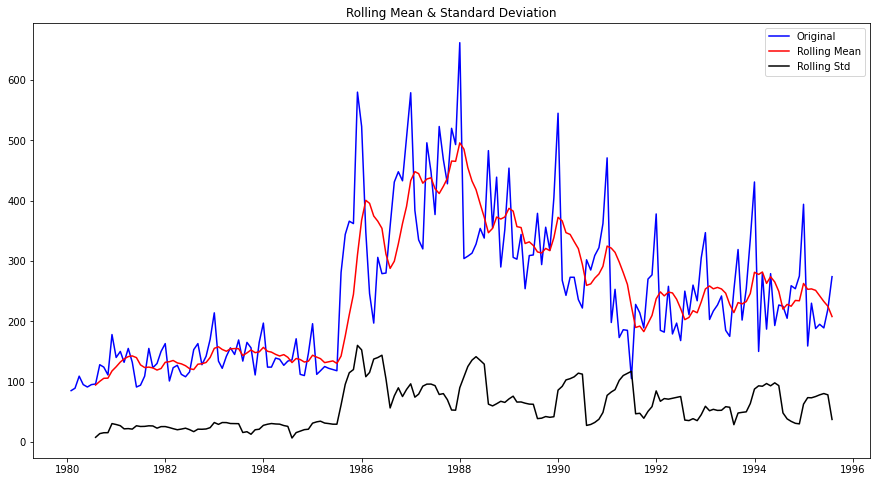

Results of Dickey-Fuller Test:
Test Statistic                  -1.717397
p-value                          0.422172
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [156]:
test_stationarity(df['Shoe_Sales'])

From the above plot, we can observe that p-value is greater than 0.05 which is 5% significnt level.

At a 5% significant level, we can see that the time series is non stationary.

**So, Let's take a difference of order 1 and check whether the Time Series is stationary or not.**

In [157]:
# the null hypothesis  for ADF test (H0) is that the time series is non-stationary 
# the alternate hypothesis for ADF test (H1) is that time series is stationary

# since the p-value of the ADF test is greater than the critical value at 5%, we cannot reject the null hypothesis 
# thus the given time given series is non stationary

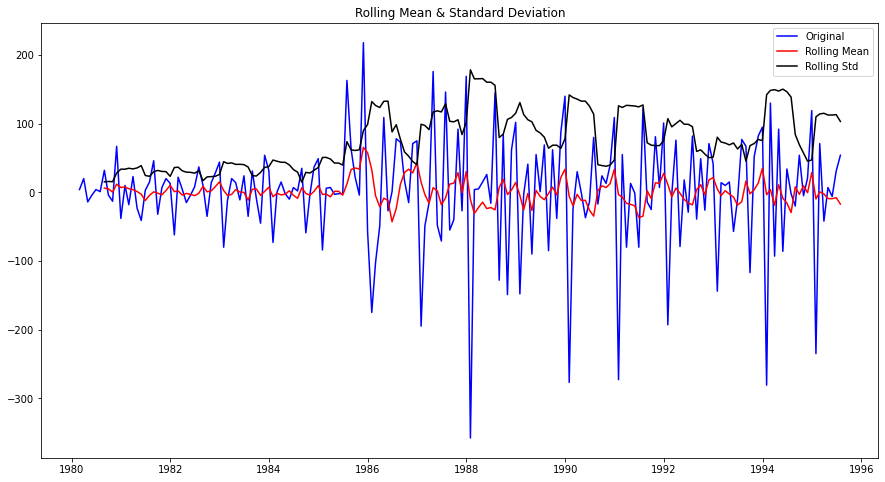

Results of Dickey-Fuller Test:
Test Statistic                  -3.479160
p-value                          0.008539
#Lags Used                      12.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [158]:
test_stationarity(df['Shoe_Sales'].diff().dropna())

Now, we can see that after taking a difference of order 1, at α = 0.05 the Time Series is indeed stationary.

#### Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data.

In [159]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

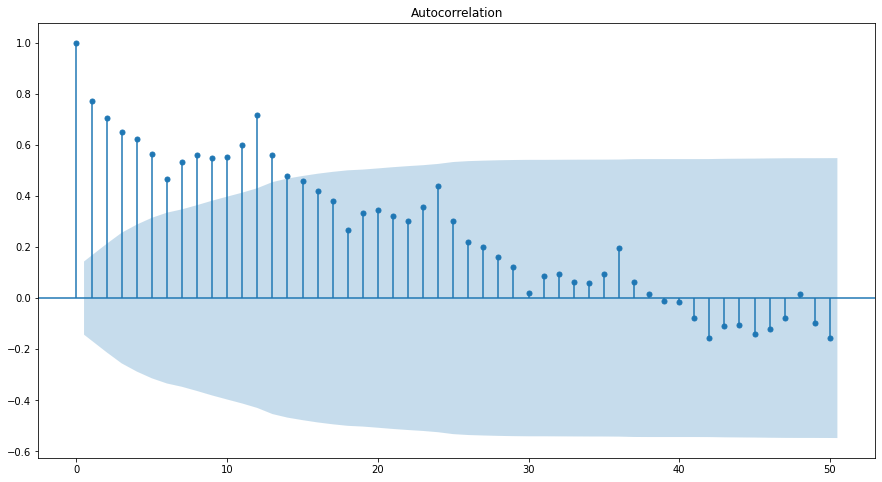

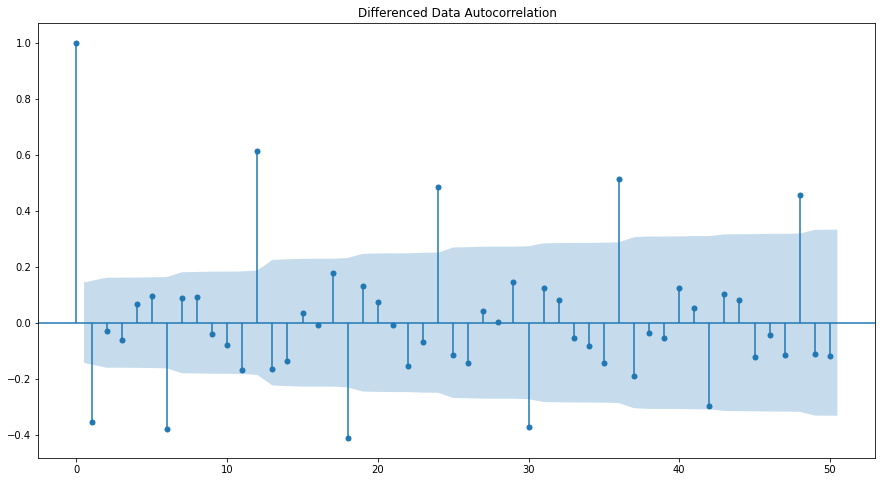

In [160]:
plot_acf(df['Shoe_Sales'],lags=50)
plot_acf(df['Shoe_Sales'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

From the ACF plot above,we can observe the auto correlation which is the shaded region represents the confidance range of that particular correlation. The values which are going beyond this confidnce range represents the significant auto correlation. we can observe the evidence of seasonality in the original series. But for now I wont take original series since it is a non-stationary, Instead will choose 1st order difference series.

From the difference plot we can see that lags 0,1,6... are having the significant auto correlation we can take these values for q (AR).

Generally, we take small value of lag so that our model would be simple as we go further with big values the model becomes complex. Hence, we will find the optimum model at lower values of lags.

Here, for q we can take lag 0 i.e., q=0.

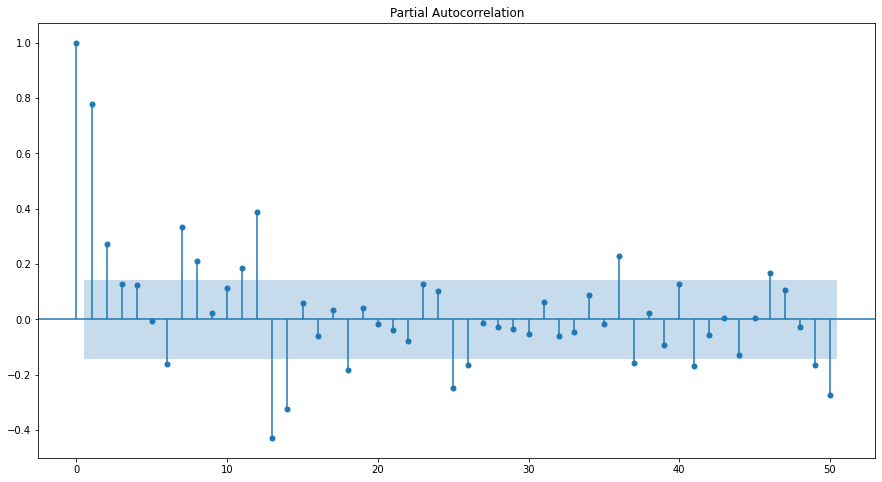

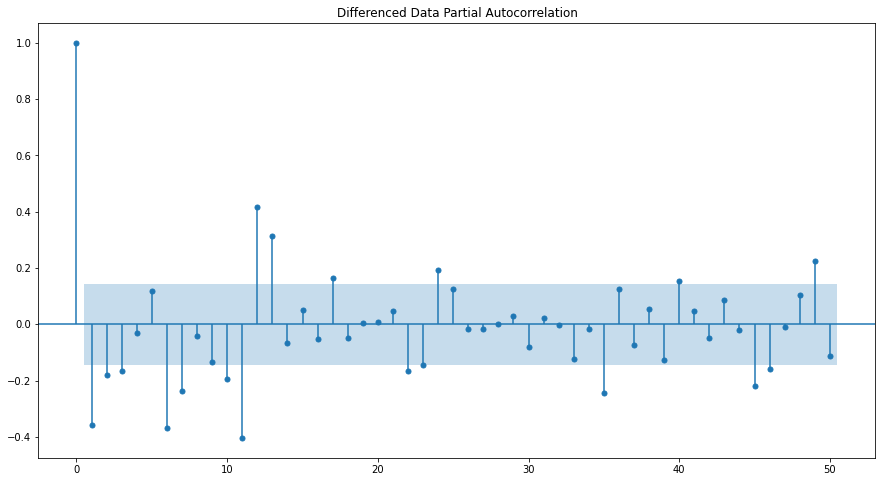

In [161]:
plot_pacf(df['Shoe_Sales'],lags=50)
plot_pacf(df['Shoe_Sales'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

From the above PACF Plot,

The First order difference PACF (partial auto correlation) gives p (MA) value in p,d,q.
If we check for the lags which are having the significant auto correlation are 0,1,2,3,6.., we need our model to be optimum and simple. so, we need to choose the lags with low value.
 
For present scenario, we can choose p = 0.

The values of p,d,q becomes (0,1,0). since, it's a first order difference at d=1.

#### Check for stationarity of the Training Data Time Series.

In [162]:
#check for the stationarity only for training data.

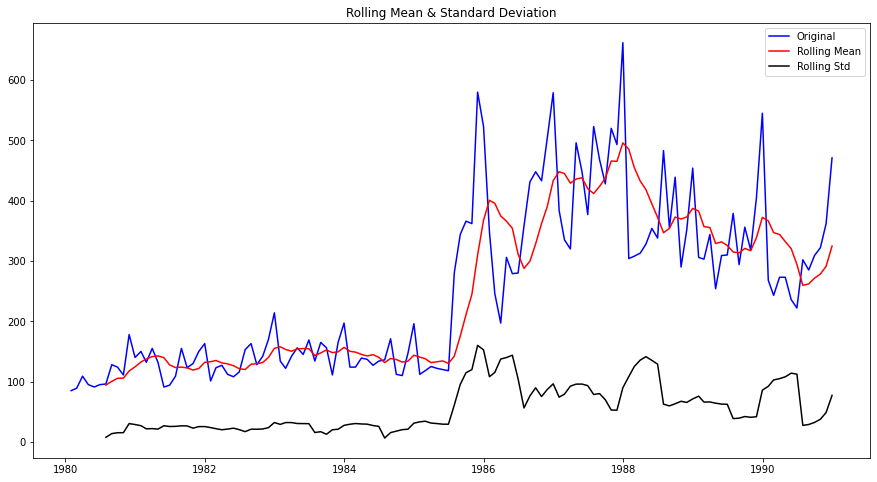

Results of Dickey-Fuller Test:
Test Statistic                  -1.361129
p-value                          0.600763
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64 



In [163]:
test_stationarity(Train['Shoe_Sales'])

we can observe that the series is not stationary at  𝛼  = 0.05.

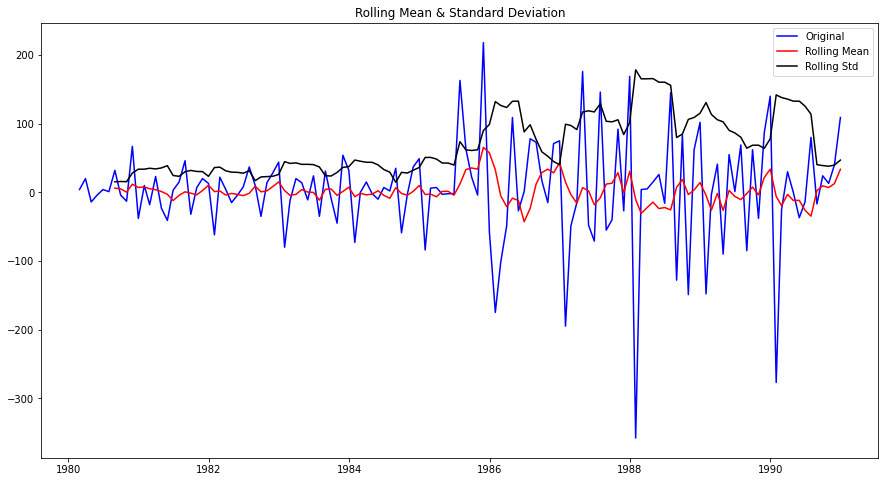

Results of Dickey-Fuller Test:
Test Statistic                  -3.144211
p-value                          0.023450
#Lags Used                      13.000000
Number of Observations Used    117.000000
Critical Value (1%)             -3.487517
Critical Value (5%)             -2.886578
Critical Value (10%)            -2.580124
dtype: float64 



In [164]:
test_stationarity(Train['Shoe_Sales'].diff().dropna())

We see that after taking a difference of order 1 the series have become stationary at $\alpha$ = 0.05.

If the series is non-stationary, stationarize it by taking a difference of the Time Series. Then, we can use this particular differenced series to train the ARIMA models. We do not need to worry about stationarity for the Test Data because we are not building any models on the Test Data, we are evaluating our models over there. You can look at other kinds of transformations as part of making the time series stationary like taking logarithms.

In [165]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1980-01-31 to 1990-12-31
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Shoe_Sales  132 non-null    int64
dtypes: int64(1)
memory usage: 2.1 KB


In [166]:
Train.shape

(132, 1)

### 6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

The data is having seasonality. So, ideally we should build the SARIMA model. But for demonstration purposes we are building an ARIMA model both by looking at the minimum AIC criterion and by looking at the ACF and the PACF plots.

#### Model11. Automated ARIMA

In [167]:
import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


Here, we got the combination of different parameters of p and q in the range of 0 and 2. We can take the value of d as 1, because we need to take a difference of the series to make it stationary.

In [168]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

we are passing the values to model with the values of train data of Shoe sales and order as param in which it takes the p,d,q combinations we got from the itertools and calculate the AIC.

In [169]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(Train['Shoe_Sales'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:1508.2837722095956
ARIMA(0, 1, 1) - AIC:1497.0503224187926
ARIMA(0, 1, 2) - AIC:1494.9646053663441
ARIMA(1, 1, 0) - AIC:1501.64312420119
ARIMA(1, 1, 1) - AIC:1492.487186507898
ARIMA(1, 1, 2) - AIC:1494.4238594575386
ARIMA(2, 1, 0) - AIC:1498.9504830258975
ARIMA(2, 1, 1) - AIC:1494.4314983035438
ARIMA(2, 1, 2) - AIC:1496.4107391784296


In [170]:
# Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value
ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
4  (1, 1, 1)  1492.487187
5  (1, 1, 2)  1494.423859
7  (2, 1, 1)  1494.431498
2  (0, 1, 2)  1494.964605
8  (2, 1, 2)  1496.410739
1  (0, 1, 1)  1497.050322
6  (2, 1, 0)  1498.950483
3  (1, 1, 0)  1501.643124
0  (0, 1, 0)  1508.283772

After sorting the values I'm choosing  (1,1,1) with AIC = 1492.487187. we can now pass these parameters and see the statistical summary.

In [171]:
arima = ARIMA(Train['Shoe_Sales'], order=(1,1,1))

results_Arima = arima.fit()

print(results_Arima.summary())

                               SARIMAX Results                                
Dep. Variable:             Shoe_Sales   No. Observations:                  132
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -743.244
Date:                Sun, 03 Apr 2022   AIC                           1492.487
Time:                        18:39:22   BIC                           1501.113
Sample:                    01-31-1980   HQIC                          1495.992
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4699      0.111      4.235      0.000       0.252       0.687
ma.L1         -0.8347      0.068    -12.261      0.000      -0.968      -0.701
sigma2      4944.0869    405.583     12.190      0.0

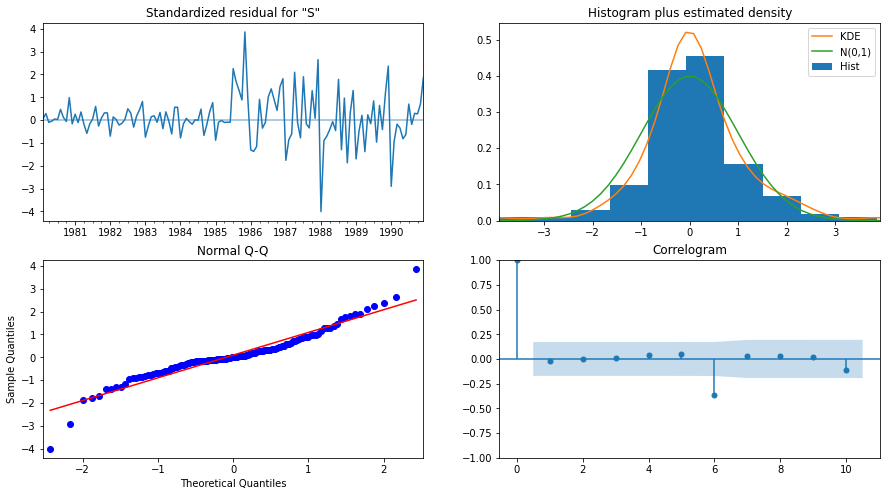

In [172]:
results_Arima.plot_diagnostics();

In [173]:
predicted_autoARIMA = results_Arima.forecast(steps=len(Test))
predicted_autoARIMA

1991-01-31    412.252023
1991-02-28    384.645964
1991-03-31    371.673697
1991-04-30    365.577944
1991-05-31    362.713509
1991-06-30    361.367493
1991-07-31    360.734991
1991-08-31    360.437774
1991-09-30    360.298110
1991-10-31    360.232481
1991-11-30    360.201641
1991-12-31    360.187150
1992-01-31    360.180340
1992-02-29    360.177140
1992-03-31    360.175636
1992-04-30    360.174930
1992-05-31    360.174598
1992-06-30    360.174442
1992-07-31    360.174368
1992-08-31    360.174334
1992-09-30    360.174318
1992-10-31    360.174310
1992-11-30    360.174307
1992-12-31    360.174305
1993-01-31    360.174304
1993-02-28    360.174304
1993-03-31    360.174304
1993-04-30    360.174304
1993-05-31    360.174303
1993-06-30    360.174303
1993-07-31    360.174303
1993-08-31    360.174303
1993-09-30    360.174303
1993-10-31    360.174303
1993-11-30    360.174303
1993-12-31    360.174303
1994-01-31    360.174303
1994-02-28    360.174303
1994-03-31    360.174303
1994-04-30    360.174303


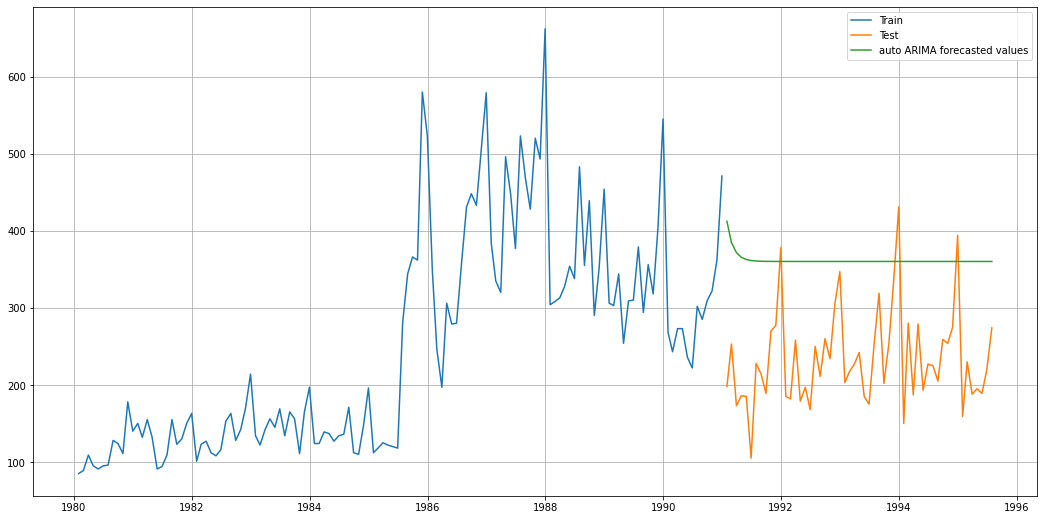

In [174]:
plt.figure(figsize=(18,9))
plt.plot(Train['Shoe_Sales'], label='Train')
plt.plot(Test['Shoe_Sales'], label='Test')

plt.plot(predicted_autoARIMA, label='auto ARIMA forecasted values')

plt.legend(loc='best')
plt.grid();

In [175]:
from sklearn.metrics import mean_squared_error

In [176]:
RMSE_autoARIMA = mean_squared_error(Test['Shoe_Sales'],predicted_autoARIMA,squared=False)
print('RMSE for the autofit ARIMA model:',RMSE_autoARIMA)

RMSE for the autofit ARIMA model: 142.82073046247484


In [177]:
results_df11 = pd.DataFrame({'Test RMSE': [RMSE_autoARIMA]}
                           ,index=['automated ARIMA(1,1,1)'])

results_df = pd.concat([results_df, results_df11])
results_df

Test RMSE
RegressionOnTime                                     73.111522
NaiveModel                                          245.121306
SimpleAverageModel                                   63.984570
2pointTrailingMovingAverage                          45.948736
4pointTrailingMovingAverage                          57.872686
6pointTrailingMovingAverage                          63.456893
9pointTrailingMovingAverage                          67.723648
Alpha=0,SimpleExponentialSmoothing                  196.404847
Alpha=0.1,SimpleExponentialSmoothing                115.874466
Alpha=0.59 and Beta=0,DoubleExponentialSmoothing    267.251583
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing        76.884339
Alpha: 0.112,Beta: 0.037 and Gamma:0.493,Triple...   99.428217
Alpha=0.1,Beta=0.6,Gamma=0.2,TripleExponentialS...   41.314898
automated ARIMA(1,1,1)                              142.820730

#### Model:12 Automated SARIMA model with seasonality 6 & 12
Let us look at the ACF plot once more to understand the seasonal parameter for the SARIMA model.

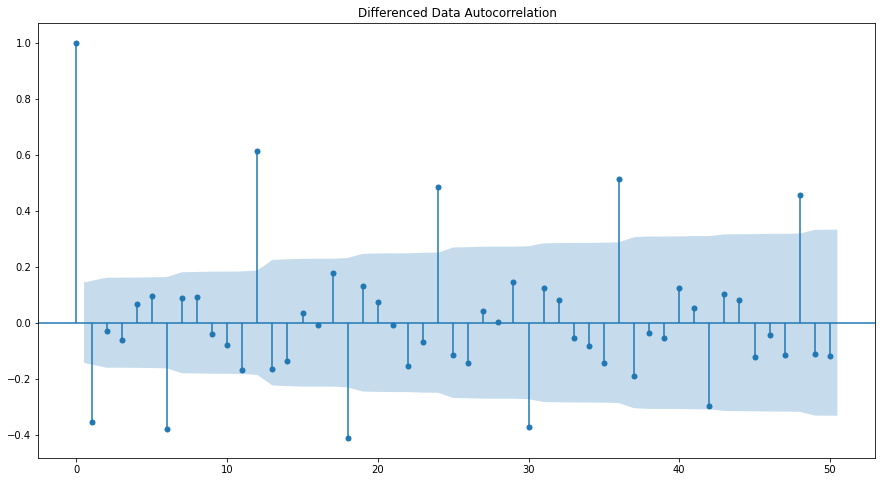

In [178]:
plot_acf(df['Shoe_Sales'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

We see that there can be a seasonality of 6 as well as 12. We will run our auto SARIMA models by setting seasonality both as 6 and 12.

In [179]:
#Setting the seasonality as 6 for the first iteration of the auto SARIMA model.

In [180]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)


In [181]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [182]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(Train['Shoe_Sales'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:1497.7788474019549
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:1426.3361157221489
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1334.5305386143484
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:1426.0492095804898
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:1385.57115635478
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1319.6061076038218
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1323.6330116787822
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1322.9358084091896
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1312.671807677995
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:1476.016777738261
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:1405.2509947832393
SARIMA(0, 1, 1)x(0, 0, 2, 6) - AIC:1312.4363431163895
SARIMA(0, 1, 1)x(1, 0, 0, 6) - AIC:1414.5028237538634
SARIMA(0, 1, 1)x(1, 0, 1, 6) - AIC:1363.4568516025197
SARIMA(0, 1, 1)x(1, 0, 2, 6) - AIC:1299.189189994953
SARIMA(0, 1, 1)x(2, 0, 0, 6) - AIC:1309.8511217450086
SARIMA(0, 1, 1)x(2, 0, 1, 6) - AIC:1311.0086038813718
SARIMA(0, 1, 1)x(2, 0, 2, 6) - AIC:1288.9756630627733
SARIMA(0, 1, 2)x(0, 0, 0, 6) - AI

We are passing the pdq values for the param and Train values of Shoe sales to the SARIMAX and fitting the model and calculating the AIC values.

So it is difficult to search for lowest AIC value, we sort the values w.r.t AIC.

In [183]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param      seasonal          AIC
80  (2, 1, 2)  (2, 0, 2, 6)  1280.778664
26  (0, 1, 2)  (2, 0, 2, 6)  1281.026602
53  (1, 1, 2)  (2, 0, 2, 6)  1282.065372
17  (0, 1, 1)  (2, 0, 2, 6)  1288.975663
50  (1, 1, 2)  (1, 0, 2, 6)  1289.791748

After sorting, the combination (2, 1, 2) (2, 0, 2, 6) have less AIC = 1280.778664.

Now we will build a model using this combination of values and check the RMSE values.

In [184]:
import statsmodels.api as sm

auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(Train['Shoe_Sales'].values,
                                order=(2, 1, 2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(2, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -631.389
Date:                           Sun, 03 Apr 2022   AIC                           1280.779
Time:                                   18:39:37   BIC                           1305.561
Sample:                                        0   HQIC                          1290.839
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0601      0.474      0.127      0.899      -0.869       0.989
ar.L2          0.3977      0.161      2.464

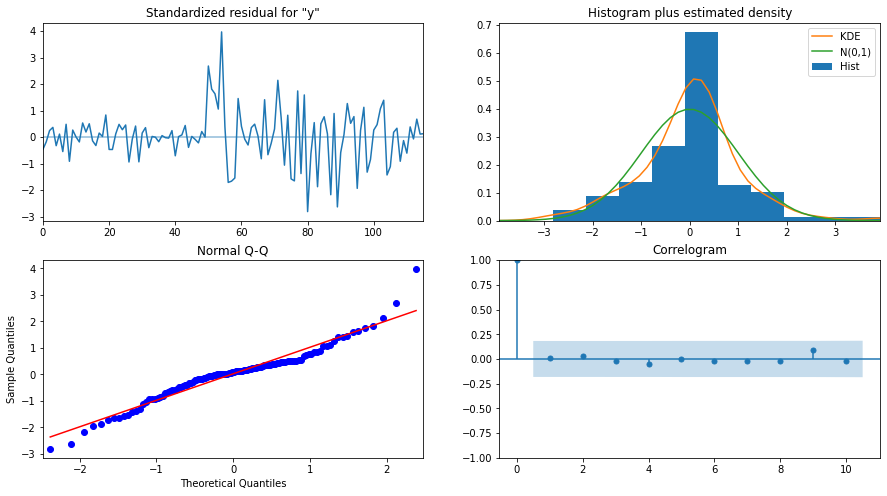

In [185]:
results_auto_SARIMA_6.plot_diagnostics()
plt.show()

In [186]:
#Predict on the Test Set using this model and evaluate the model.

In [187]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(Test))

In [188]:
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y        mean    mean_se  mean_ci_lower  mean_ci_upper
0  257.242984  55.501902     148.461256     366.024713
1  257.175466  64.584738     130.591706     383.759226
2  265.714757  73.831752     121.007182     410.422331
3  263.007825  78.614949     108.925355     417.090294
4  240.045923  83.309217      76.762857     403.328989

In [189]:
RMSE_autoSARIMA6 = mean_squared_error(Test['Shoe_Sales'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print('RMSE for the autofit SARIMA model:',RMSE_autoSARIMA6)

RMSE for the autofit SARIMA model: 57.031260189099534


In [190]:
results_df12 = pd.DataFrame({'Test RMSE': [RMSE_autoSARIMA6]}
                           ,index=['automatedSARIMA(2,1,2)(2,0,2,6)'])


results_df = pd.concat([results_df,results_df12])

results_df

Test RMSE
RegressionOnTime                                     73.111522
NaiveModel                                          245.121306
SimpleAverageModel                                   63.984570
2pointTrailingMovingAverage                          45.948736
4pointTrailingMovingAverage                          57.872686
6pointTrailingMovingAverage                          63.456893
9pointTrailingMovingAverage                          67.723648
Alpha=0,SimpleExponentialSmoothing                  196.404847
Alpha=0.1,SimpleExponentialSmoothing                115.874466
Alpha=0.59 and Beta=0,DoubleExponentialSmoothing    267.251583
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing        76.884339
Alpha: 0.112,Beta: 0.037 and Gamma:0.493,Triple...   99.428217
Alpha=0.1,Beta=0.6,Gamma=0.2,TripleExponentialS...   41.314898
automated ARIMA(1,1,1)                              142.820730
automatedSARIMA(2,1,2)(2,0,2,6)                      57.031260

#### Setting the seasonality as 12 for the second iteration of the auto SARIMA model.

In [191]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [192]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [193]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(Train['Shoe_Sales'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1497.7788474019549
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1338.3663267373176
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1208.4142473347138
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1327.3970510547892
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1312.5867978686588
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1187.0843995009275
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1201.0600831567197
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1200.7545174421252
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1188.0396305010802
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1476.016777738261
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1318.3861206387705
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:1185.484242614408
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1313.5738277003295
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1287.7675669260966
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:1164.2974585352838
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:1188.1632556767725
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1188.2091371919
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:1165.875706050639
SARIMA(0, 1, 2)x

In [194]:
SARIMA_AIC.sort_values(by=['AIC'], ascending=True).head()

param       seasonal          AIC
23  (0, 1, 2)  (1, 0, 2, 12)  1156.165429
50  (1, 1, 2)  (1, 0, 2, 12)  1157.082589
26  (0, 1, 2)  (2, 0, 2, 12)  1157.772313
77  (2, 1, 2)  (1, 0, 2, 12)  1158.490998
80  (2, 1, 2)  (2, 0, 2, 12)  1158.630324

After sorting, the combination (0, 1, 2) (1, 0, 2, 12) have less AIC = 1156.165429

Now we will build a model using this combination of values and check the RMSE values.

In [195]:
import statsmodels.api as sm

sarima = sm.tsa.statespace.SARIMAX(Train['Shoe_Sales'],
                                order=(0,1,2),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_SARIMA = sarima.fit()
print(results_SARIMA.summary())

                                     SARIMAX Results                                      
Dep. Variable:                         Shoe_Sales   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(1, 0, 2, 12)   Log Likelihood                -572.083
Date:                            Sun, 03 Apr 2022   AIC                           1156.165
Time:                                    18:40:00   BIC                           1172.032
Sample:                                01-31-1980   HQIC                          1162.593
                                     - 12-31-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3742      0.081     -4.632      0.000      -0.533      -0.216
ma.L2          0.0616      0.077   

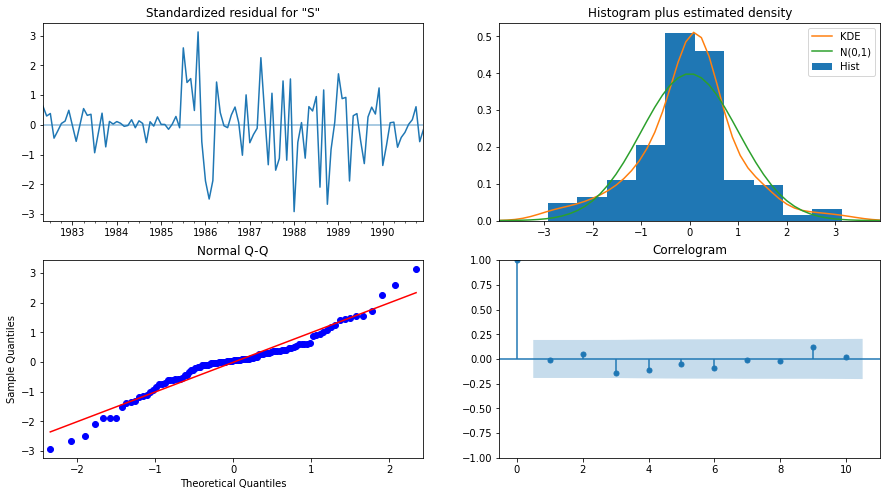

In [196]:
results_SARIMA.plot_diagnostics();

In [197]:
predicted_autoSARIMA = results_SARIMA.forecast(steps=len(Test))
predicted_autoSARIMA

1991-01-31    225.292061
1991-02-28    199.179253
1991-03-31    213.554162
1991-04-30    238.613124
1991-05-31    215.720845
1991-06-30    204.146772
1991-07-31    302.287408
1991-08-31    293.780080
1991-09-30    305.059221
1991-10-31    293.551405
1991-11-30    363.415127
1991-12-31    462.349914
1992-01-31    221.622450
1992-02-29    195.467671
1992-03-31    207.813781
1992-04-30    234.198413
1992-05-31    219.197892
1992-06-30    208.513684
1992-07-31    314.578808
1992-08-31    304.485310
1992-09-30    314.662006
1992-10-31    295.891213
1992-11-30    379.546346
1992-12-31    483.674726
1993-01-31    227.371949
1993-02-28    199.672940
1993-03-31    212.802955
1993-04-30    240.862854
1993-05-31    224.909890
1993-06-30    213.547298
1993-07-31    326.346926
1993-08-31    315.612551
1993-09-30    326.435407
1993-10-31    306.472780
1993-11-30    395.439516
1993-12-31    506.179429
1994-01-31    233.602951
1994-02-28    204.145219
1994-03-31    218.108912
1994-04-30    247.950448


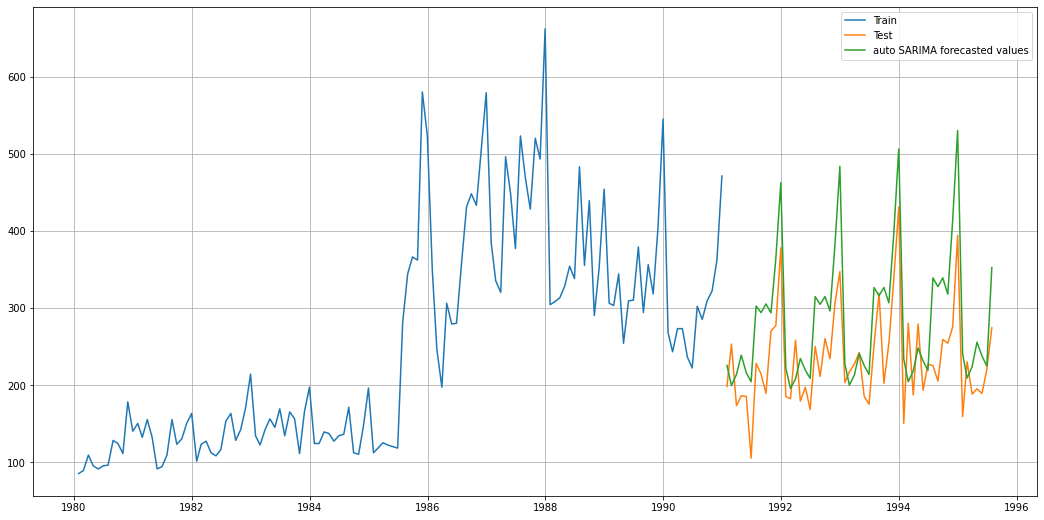

In [198]:
plt.figure(figsize=(18,9))
plt.plot(Train['Shoe_Sales'], label='Train')
plt.plot(Test['Shoe_Sales'], label='Test')

plt.plot(predicted_autoSARIMA, label='auto SARIMA forecasted values')

plt.legend(loc='best')
plt.grid();

In [199]:
RMSE_autoSARIMA = mean_squared_error(Test['Shoe_Sales'],predicted_autoSARIMA,squared=False)
print('RMSE for the autofit SARIMA model:',RMSE_autoSARIMA)

RMSE for the autofit SARIMA model: 69.03066432738571


In [200]:
results_df13 = pd.DataFrame({'Test RMSE': [RMSE_autoSARIMA]}
                           ,index=['automated SARIMA(0,1,2)*(1,0,2,12)'])

results_df = pd.concat([results_df, results_df13])
results_df

Test RMSE
RegressionOnTime                                     73.111522
NaiveModel                                          245.121306
SimpleAverageModel                                   63.984570
2pointTrailingMovingAverage                          45.948736
4pointTrailingMovingAverage                          57.872686
6pointTrailingMovingAverage                          63.456893
9pointTrailingMovingAverage                          67.723648
Alpha=0,SimpleExponentialSmoothing                  196.404847
Alpha=0.1,SimpleExponentialSmoothing                115.874466
Alpha=0.59 and Beta=0,DoubleExponentialSmoothing    267.251583
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing        76.884339
Alpha: 0.112,Beta: 0.037 and Gamma:0.493,Triple...   99.428217
Alpha=0.1,Beta=0.6,Gamma=0.2,TripleExponentialS...   41.314898
automated ARIMA(1,1,1)                              142.820730
automatedSARIMA(2,1,2)(2,0,2,6)                      57.031260
automated SARIMA(0,1,2)*(1,0,2,12)                   69.030664

We can observe that the RMSE value have not reduced further when the seasonality parameter was changed to 12.

### 7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

#### Model13: Manual ARIMA with cut-off values from ACF and PACF graphs

In [201]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

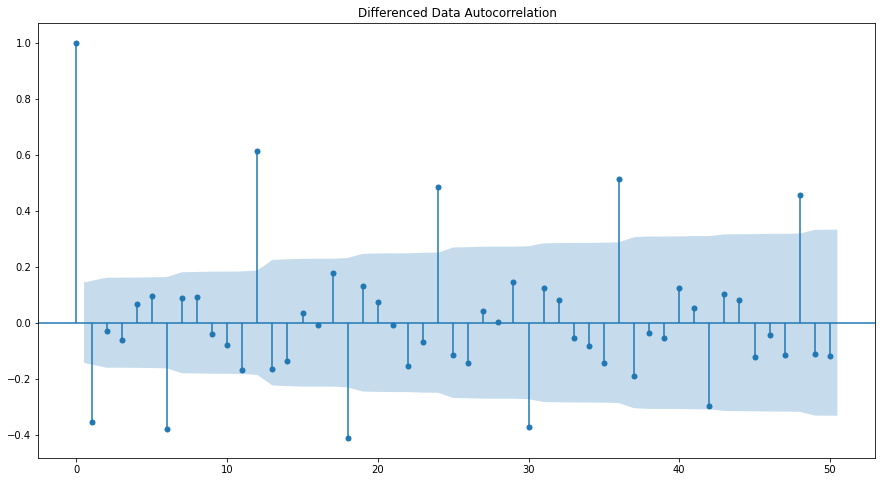

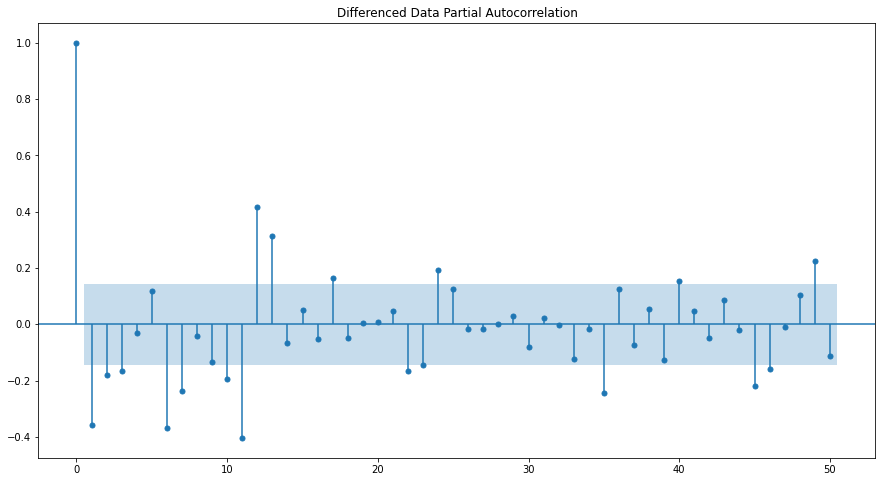

In [202]:
plot_acf(df['Shoe_Sales'].diff(1).dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['Shoe_Sales'].diff(1).dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

In [203]:
manual_ARIMA = ARIMA(Train['Shoe_Sales'], order=(3,1,2),freq='M')

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:             Shoe_Sales   No. Observations:                  132
Model:                 ARIMA(3, 1, 2)   Log Likelihood                -741.828
Date:                Sun, 03 Apr 2022   AIC                           1495.656
Time:                        18:40:01   BIC                           1512.907
Sample:                    01-31-1980   HQIC                          1502.666
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4389      0.146     -3.009      0.003      -0.725      -0.153
ar.L2          0.4463      0.157      2.850      0.004       0.139       0.753
ar.L3          0.0809      0.115      0.701      0.4

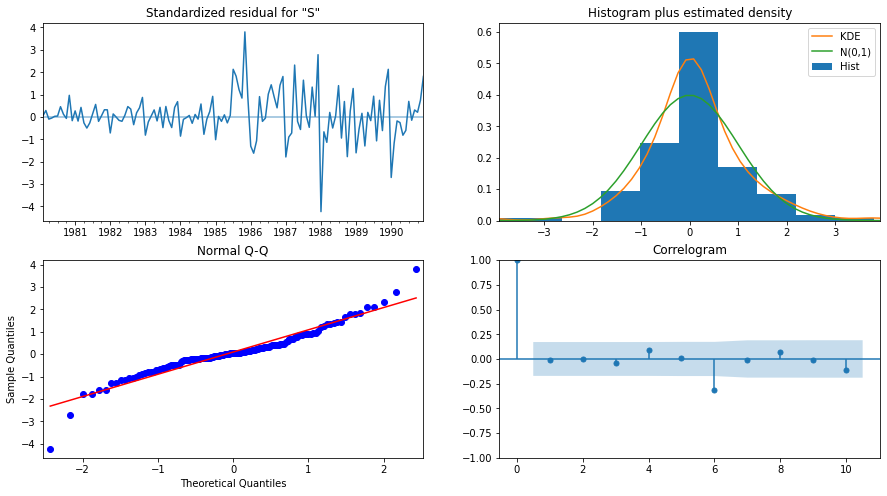

In [204]:
results_manual_ARIMA.plot_diagnostics();

In [205]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(Test))

In [206]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(Test))
predicted_manual_ARIMA

1991-01-31    410.795971
1991-02-28    388.134466
1991-03-31    380.029153
1991-04-30    368.601761
1991-05-31    368.165999
1991-06-30    362.601469
1991-07-31    363.924520
1991-08-31    360.825195
1991-09-30    362.325648
1991-10-31    360.390977
1991-11-30    361.658928
1991-12-31    360.360428
1992-01-31    361.339650
1992-02-29    360.432973
1992-03-31    361.162848
1992-04-30    360.517110
1992-05-31    361.052886
1992-06-30    360.588614
1992-07-31    360.979238
1992-08-31    360.643951
1992-09-30    360.927868
1992-10-31    360.685233
1992-11-30    360.891302
1992-12-31    360.715549
1993-01-31    360.865018
1993-02-28    360.737656
1993-03-31    360.846038
1993-04-30    360.753725
1993-05-31    360.832304
1993-06-30    360.765388
1993-07-31    360.822356
1993-08-31    360.773848
1993-09-30    360.815147
1993-10-31    360.779982
1993-11-30    360.809922
1993-12-31    360.784430
1994-01-31    360.806135
1994-02-28    360.787655
1994-03-31    360.803389
1994-04-30    360.789992


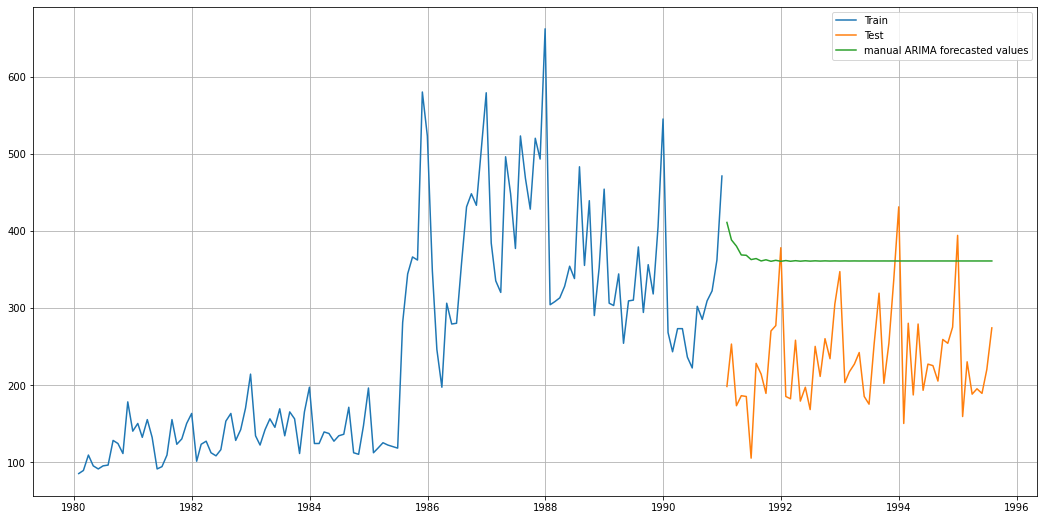

In [207]:
plt.figure(figsize=(18,9))
plt.plot(Train['Shoe_Sales'], label='Train')
plt.plot(Test['Shoe_Sales'], label='Test')

plt.plot(predicted_manual_ARIMA, label='manual ARIMA forecasted values')

plt.legend(loc='best')
plt.grid();

In [208]:
from sklearn.metrics import mean_squared_error

In [209]:
RMSE_manual_ARIMA = mean_squared_error(Test['Shoe_Sales'],predicted_manual_ARIMA,squared=False)
print('RMSE for the manual ARIMA model:',RMSE_manual_ARIMA)

RMSE for the manual ARIMA model: 143.83459044633278


In [210]:
results_df14 = pd.DataFrame({'Test RMSE': [RMSE_manual_ARIMA]}
                           ,index=['manual ARIMA(3,1,2)'])

results_df = pd.concat([results_df, results_df14])
results_df

Test RMSE
RegressionOnTime                                     73.111522
NaiveModel                                          245.121306
SimpleAverageModel                                   63.984570
2pointTrailingMovingAverage                          45.948736
4pointTrailingMovingAverage                          57.872686
6pointTrailingMovingAverage                          63.456893
9pointTrailingMovingAverage                          67.723648
Alpha=0,SimpleExponentialSmoothing                  196.404847
Alpha=0.1,SimpleExponentialSmoothing                115.874466
Alpha=0.59 and Beta=0,DoubleExponentialSmoothing    267.251583
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing        76.884339
Alpha: 0.112,Beta: 0.037 and Gamma:0.493,Triple...   99.428217
Alpha=0.1,Beta=0.6,Gamma=0.2,TripleExponentialS...   41.314898
automated ARIMA(1,1,1)                              142.820730
automatedSARIMA(2,1,2)(2,0,2,6)                      57.031260
automated SARIMA(0,1,2)*(1,0,2,12)                   69.030664
manual ARIMA(3,1,2)                                 143.834590

#### Model14: manual SARIMA

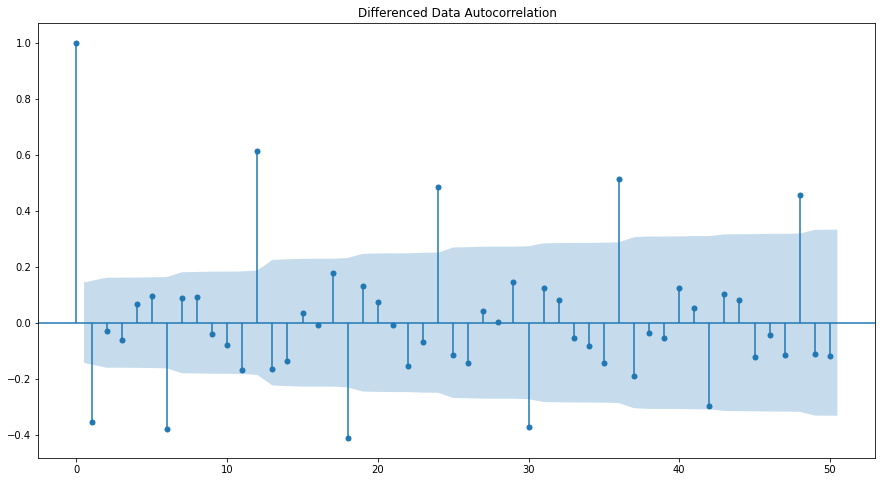

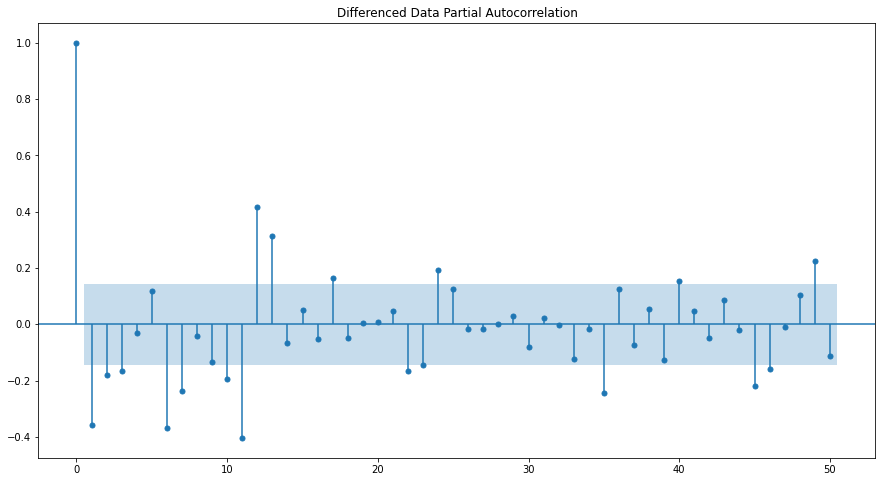

In [211]:
plot_acf(df['Shoe_Sales'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['Shoe_Sales'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

We can observe that the above ACF plot at the seasonal interval (6) does not taper off. 

Hence, we are taking a seasonal differencing of original series.

In [212]:
# Before that let us look at the original series.

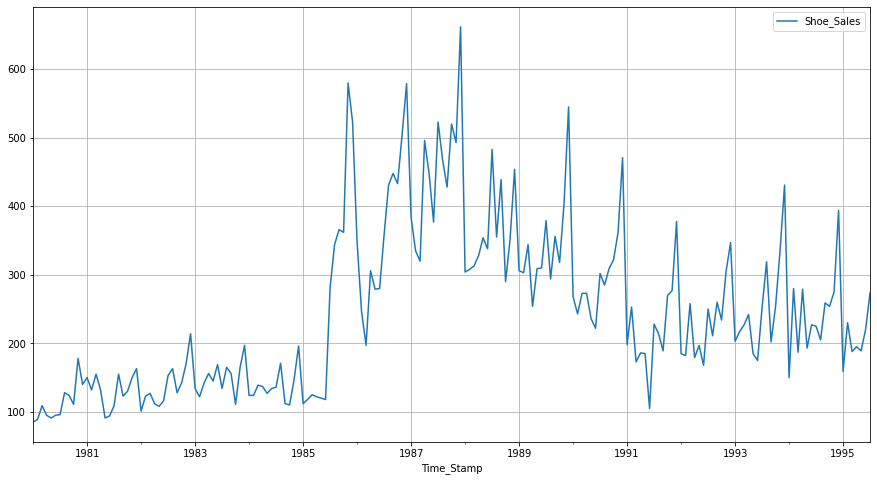

In [213]:
df.plot()
plt.grid();

Here, We can observe that there is a trend and a seasonality. So, we can take a seasonal differencing and check the series.

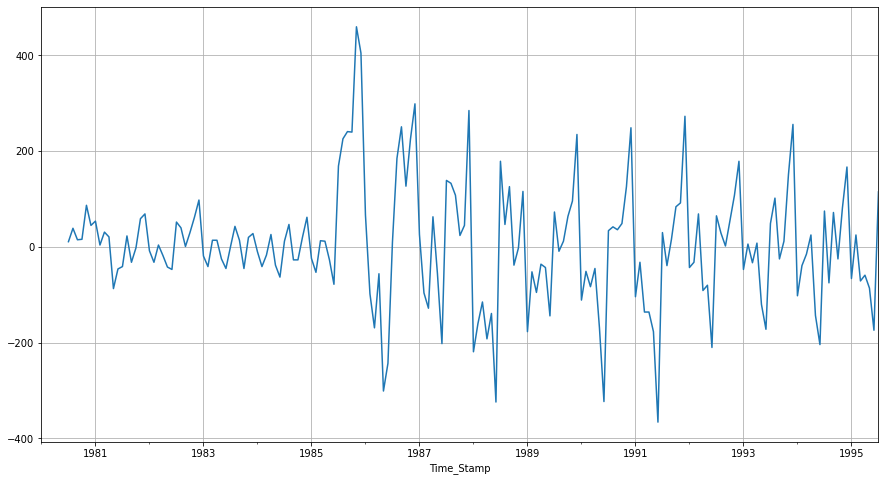

In [214]:
(df['Shoe_Sales'].diff(6)).plot()
plt.grid();

There is a slight trend which we can observe in the data. So, we take a differencing of first order on the seasonally differenced series.

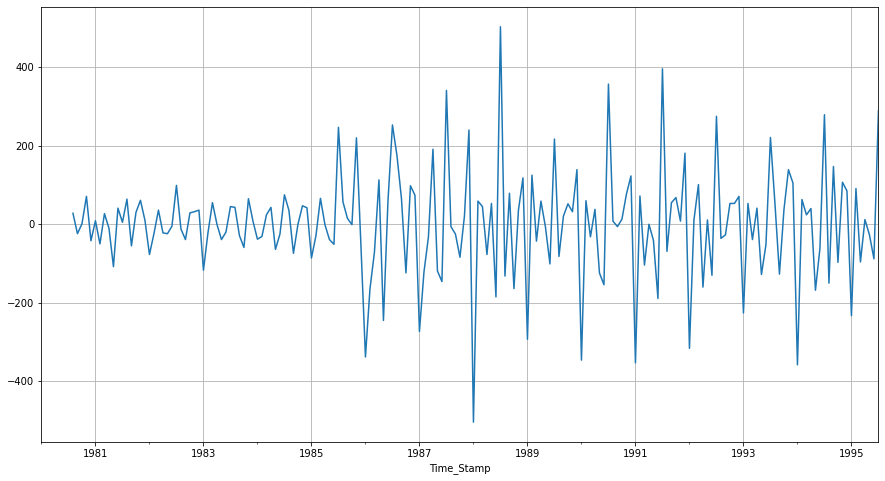

In [215]:
(df['Shoe_Sales'].diff(6)).diff().plot()
plt.grid();

Here, There is almost no trend present in the data. Only the seasonality is present in the data.

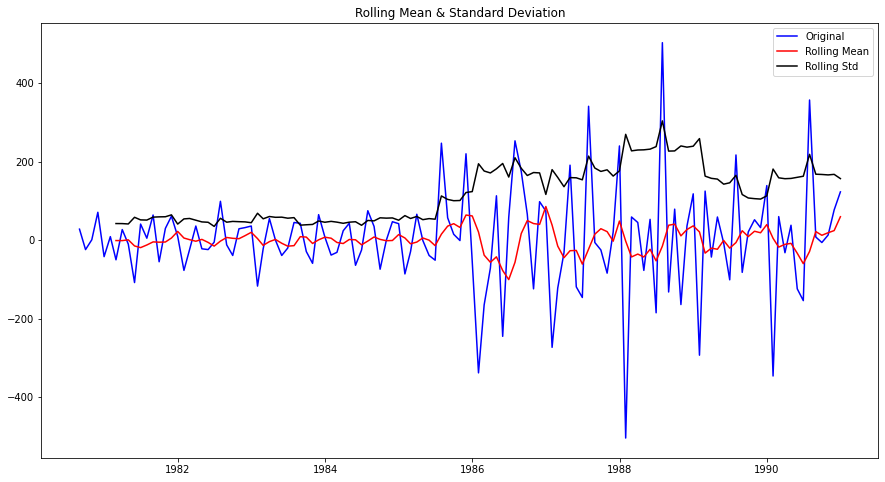

Results of Dickey-Fuller Test:
Test Statistic                -1.133336e+01
p-value                        1.098825e-20
#Lags Used                     6.000000e+00
Number of Observations Used    1.180000e+02
Critical Value (1%)           -3.487022e+00
Critical Value (5%)           -2.886363e+00
Critical Value (10%)          -2.580009e+00
dtype: float64 



In [216]:
#check the stationarity of the above series before fitting the SARIMA model.
test_stationarity((Train.diff(6).dropna()).diff(1).dropna())

In [217]:
# Check the ACF and the PACF plots for the new modified Time Series.

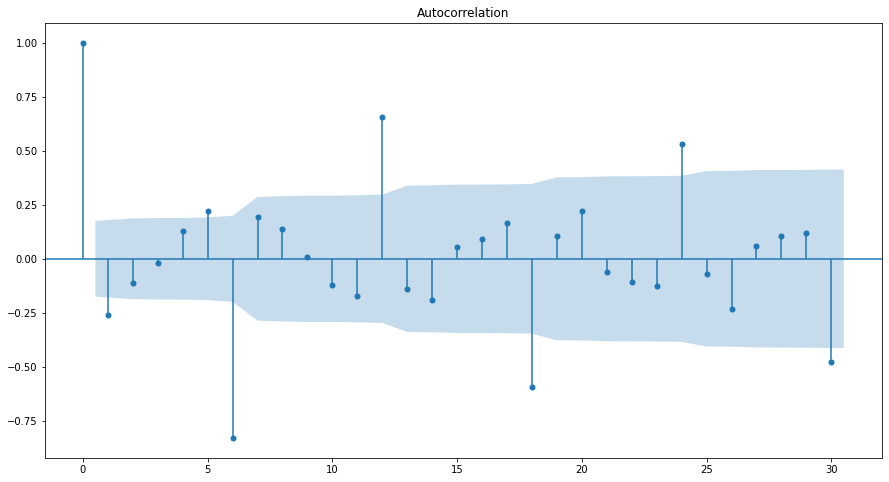

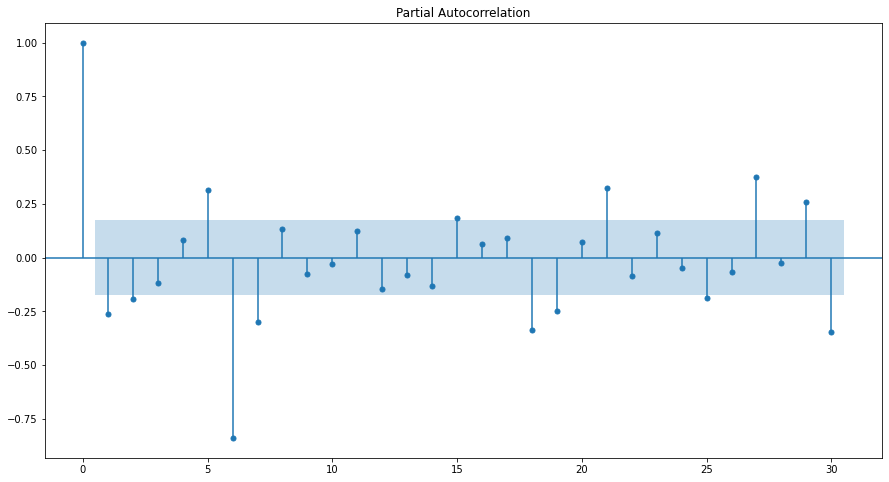

In [218]:
plot_acf((Train.diff(6).dropna()).diff(1).dropna(),lags=30)
plot_pacf((Train.diff(6).dropna()).diff(1).dropna(),lags=30);

In [219]:
import statsmodels.api as sm

manual_SARIMA_6 = sm.tsa.statespace.SARIMAX(Train.values,
                                order=(0, 1, 0),
                                seasonal_order=(1, 1, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA_6.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

                                         SARIMAX Results                                         
Dep. Variable:                                         y   No. Observations:                  132
Model:             SARIMAX(0, 1, 0)x(1, 1, [1, 2, 3], 6)   Log Likelihood                -589.644
Date:                                   Sun, 03 Apr 2022   AIC                           1189.288
Time:                                           18:40:04   BIC                           1202.605
Sample:                                                0   HQIC                          1194.685
                                                   - 132                                         
Covariance Type:                                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L6       -0.9858      0.047    -20.957      0.000    

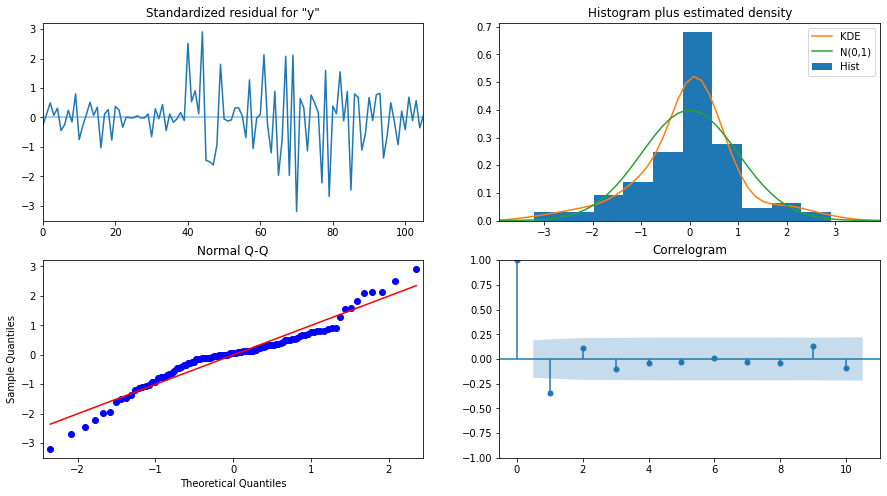

In [220]:
results_manual_SARIMA.plot_diagnostics()
plt.show()

In [221]:
# Predict on the Test Set using this model and evaluate the model

In [222]:
predicted_manual_SARIMA = results_manual_SARIMA.forecast(steps=len(Test))
predicted_manual_SARIMA

array([254.89133878, 248.92147552, 259.29271667, 260.77384175,
       256.43438182, 232.66162163, 329.06292284, 290.73929366,
       316.10849605, 309.62629596, 365.18709816, 468.96180254,
       259.08889548, 249.71510041, 260.74988546, 259.68413865,
       257.69042988, 235.43227917, 327.48619923, 289.57349582,
       314.73922964, 308.3339129 , 363.07776287, 465.06350546,
       259.47627104, 249.69738305, 260.93274855, 259.79120971,
       258.60285701, 238.10827484, 325.93735485, 288.4239943 ,
       313.39199478, 307.06139426, 361.01131972, 461.25852657,
       259.8361631 , 249.66360068, 261.09389282, 259.87869831,
       259.47300084, 240.69227692, 324.41560386, 287.29032976,
       312.06617048, 305.80818012, 358.98655967, 457.54423549,
       260.16934635, 249.61420614, 261.23393044, 259.94715643,
       260.30205323, 243.18687845, 322.92018256])

In [223]:
predicted_manual_SARIMA_date = pd.DataFrame(predicted_manual_SARIMA, index=Test.index, columns=Test.columns)
predicted_manual_SARIMA_date

Shoe_Sales
Time_Stamp            
1991-01-31  254.891339
1991-02-28  248.921476
1991-03-31  259.292717
1991-04-30  260.773842
1991-05-31  256.434382
1991-06-30  232.661622
1991-07-31  329.062923
1991-08-31  290.739294
1991-09-30  316.108496
1991-10-31  309.626296
1991-11-30  365.187098
1991-12-31  468.961803
1992-01-31  259.088895
1992-02-29  249.715100
1992-03-31  260.749885
1992-04-30  259.684139
1992-05-31  257.690430
1992-06-30  235.432279
1992-07-31  327.486199
1992-08-31  289.573496
1992-09-30  314.739230
1992-10-31  308.333913
1992-11-30  363.077763
1992-12-31  465.063505
1993-01-31  259.476271
1993-02-28  249.697383
1993-03-31  260.932749
1993-04-30  259.791210
1993-05-31  258.602857
1993-06-30  238.108275
1993-07-31  325.937355
1993-08-31  288.423994
1993-09-30  313.391995
1993-10-31  307.061394
1993-11-30  361.011320
1993-12-31  461.258527
1994-01-31  259.836163
1994-02-28  249.663601
1994-03-31  261.093893
1994-04-30  259.878698
1994-05-31  259.473001
1994-06-30  240.692277
1994-07-31  324.415604
1994-08-31  287.290330
1994-09-30  312.066170
1994-10-31  305.808180
1994-11-30  358.986560
1994-12-31  457.544235
1995-01-31  260.169346
1995-02-28  249.614206
1995-03-31  261.233930
1995-04-30  259.947156
1995-05-31  260.302053
1995-06-30  243.186878
1995-07-31  322.920183

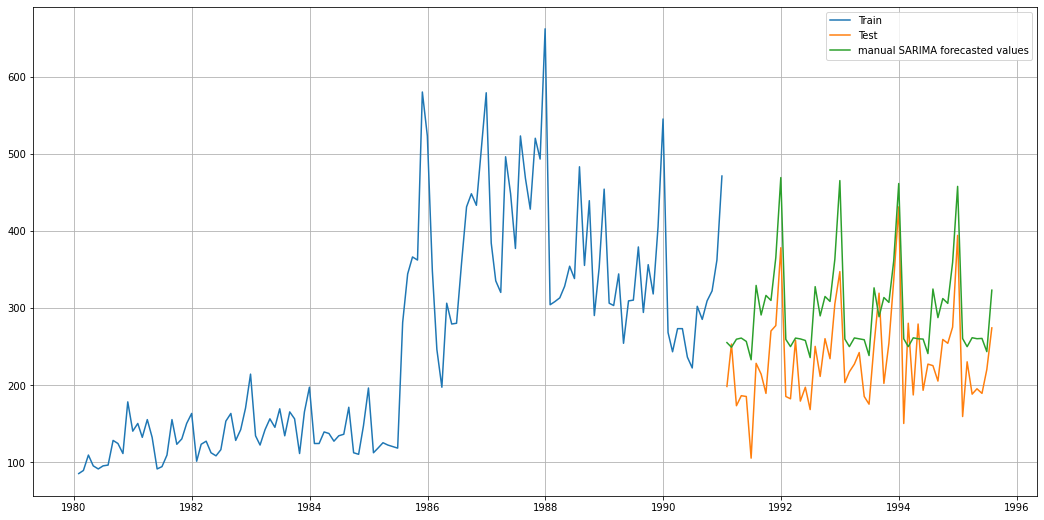

In [224]:
plt.figure(figsize=(18,9))
plt.plot(Train['Shoe_Sales'], label='Train')
plt.plot(Test['Shoe_Sales'], label='Test')

plt.plot(predicted_manual_SARIMA_date, label='manual SARIMA forecasted values')

plt.legend(loc='best')
plt.grid();

In [225]:
from sklearn.metrics import mean_squared_error

In [226]:
RMSE_manual_SARIMA = mean_squared_error(Test['Shoe_Sales'],predicted_manual_SARIMA,squared=False)
print('RMSE for the manual SARIMA model:',RMSE_manual_SARIMA)

RMSE for the manual SARIMA model: 70.5314846015135


In [227]:
results_df15 = pd.DataFrame({'Test RMSE': [RMSE_manual_SARIMA]}
                           ,index=['manual SARIMA(0,1,0)(1,1,3,6)'])

results_df = pd.concat([results_df, results_df15])
results_df

Test RMSE
RegressionOnTime                                     73.111522
NaiveModel                                          245.121306
SimpleAverageModel                                   63.984570
2pointTrailingMovingAverage                          45.948736
4pointTrailingMovingAverage                          57.872686
6pointTrailingMovingAverage                          63.456893
9pointTrailingMovingAverage                          67.723648
Alpha=0,SimpleExponentialSmoothing                  196.404847
Alpha=0.1,SimpleExponentialSmoothing                115.874466
Alpha=0.59 and Beta=0,DoubleExponentialSmoothing    267.251583
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing        76.884339
Alpha: 0.112,Beta: 0.037 and Gamma:0.493,Triple...   99.428217
Alpha=0.1,Beta=0.6,Gamma=0.2,TripleExponentialS...   41.314898
automated ARIMA(1,1,1)                              142.820730
automatedSARIMA(2,1,2)(2,0,2,6)                      57.031260
automated SARIMA(0,1,2)*(1,0,2,12)                   69.030664
manual ARIMA(3,1,2)                                 143.834590
manual SARIMA(0,1,0)(1,1,3,6)                        70.531485

### 8. Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [228]:
results_df

Test RMSE
RegressionOnTime                                     73.111522
NaiveModel                                          245.121306
SimpleAverageModel                                   63.984570
2pointTrailingMovingAverage                          45.948736
4pointTrailingMovingAverage                          57.872686
6pointTrailingMovingAverage                          63.456893
9pointTrailingMovingAverage                          67.723648
Alpha=0,SimpleExponentialSmoothing                  196.404847
Alpha=0.1,SimpleExponentialSmoothing                115.874466
Alpha=0.59 and Beta=0,DoubleExponentialSmoothing    267.251583
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing        76.884339
Alpha: 0.112,Beta: 0.037 and Gamma:0.493,Triple...   99.428217
Alpha=0.1,Beta=0.6,Gamma=0.2,TripleExponentialS...   41.314898
automated ARIMA(1,1,1)                              142.820730
automatedSARIMA(2,1,2)(2,0,2,6)                      57.031260
automated SARIMA(0,1,2)*(1,0,2,12)                   69.030664
manual ARIMA(3,1,2)                                 143.834590
manual SARIMA(0,1,0)(1,1,3,6)                        70.531485

In [229]:
results_df.sort_values(by=['Test RMSE'], ascending=True)

Test RMSE
Alpha=0.1,Beta=0.6,Gamma=0.2,TripleExponentialS...   41.314898
2pointTrailingMovingAverage                          45.948736
automatedSARIMA(2,1,2)(2,0,2,6)                      57.031260
4pointTrailingMovingAverage                          57.872686
6pointTrailingMovingAverage                          63.456893
SimpleAverageModel                                   63.984570
9pointTrailingMovingAverage                          67.723648
automated SARIMA(0,1,2)*(1,0,2,12)                   69.030664
manual SARIMA(0,1,0)(1,1,3,6)                        70.531485
RegressionOnTime                                     73.111522
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing        76.884339
Alpha: 0.112,Beta: 0.037 and Gamma:0.493,Triple...   99.428217
Alpha=0.1,SimpleExponentialSmoothing                115.874466
automated ARIMA(1,1,1)                              142.820730
manual ARIMA(3,1,2)                                 143.834590
Alpha=0,SimpleExponentialSmoothing                  196.404847
NaiveModel                                          245.121306
Alpha=0.59 and Beta=0,DoubleExponentialSmoothing    267.251583

Alpha=0.1,Beta=0.6,Gamma=0.2, TripleExponentialSmoothing is the best optimised model with the least RMSE value.

### 9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

In [230]:
final_model = ExponentialSmoothing(df,
                                  trend='additive',
                                  seasonal='multiplicative',freq='M').fit(smoothing_level=0.1,
                                                                 smoothing_trend=0.6,
                                                                 smoothing_seasonal=0.2)

In [231]:
RMSE_final_model = metrics.mean_squared_error(df['Shoe_Sales'],final_model.fittedvalues,squared=False)

print('RMSE:',RMSE_final_model)

RMSE: 65.72957832870476


In [232]:
# Getting the predictions for the same number of times stamps that are present in the test data
prediction = final_model.forecast(steps=len(Test))

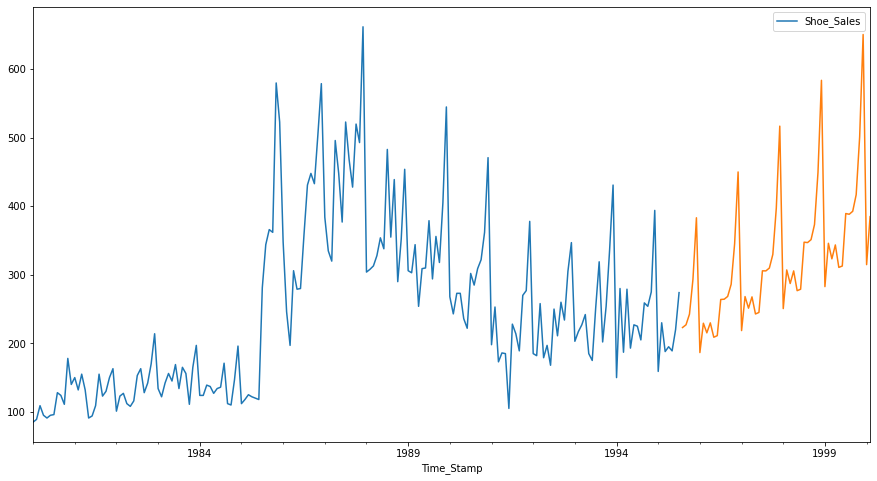

In [233]:
df.plot()
prediction.plot();

We assume that while calculating the confidence bands, the standard deviation of the forecast distribution is almost equal to the residual standard deviation.

In [234]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#Here we are taking the multiplier to be 1.96 as we want to plot with respect to a 95% confidence intervals.
prediction_df = pd.DataFrame({'lower_CI':prediction - 1.96*np.std(final_model.resid,ddof=1),
                          'prediction':prediction,
                          'upper_ci': prediction + 1.96*np.std(final_model.resid,ddof=1)})
prediction_df.head()

lower_CI  prediction    upper_ci
1995-08-31   93.929888  223.070877  352.211866
1995-09-30   97.890459  227.031448  356.172437
1995-10-31  113.444192  242.585181  371.726170
1995-11-30  164.320184  293.461173  422.602162
1995-12-31  254.106202  383.247191  512.388180

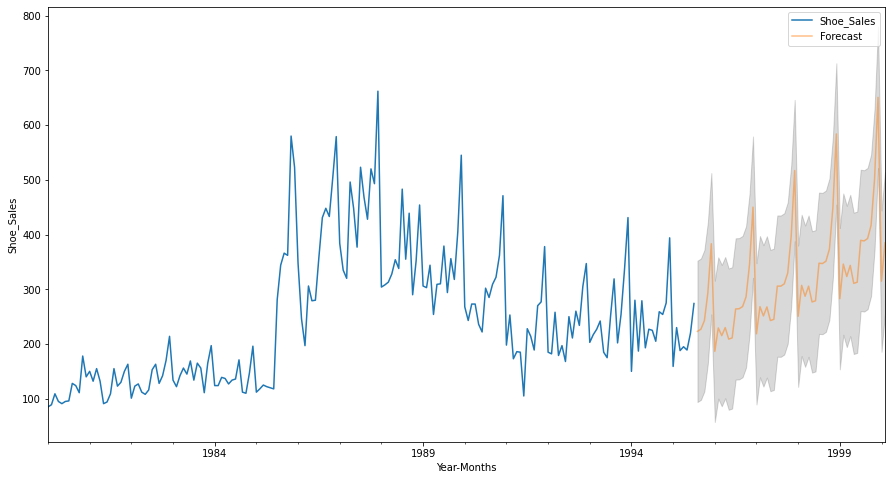

In [235]:
# plot the forecast along with the confidence band

axis = df.plot(label='Actual', figsize=(15,8))
prediction_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(prediction_df.index, prediction_df['lower_CI'], prediction_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Shoe_Sales')
plt.legend(loc='best')
plt.show()

### 10. Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future sales.

Time series analysis involves understanding various aspects about the inherent nature of the series so that you are better informed to create meaningful and accurate forecasts.

Any time series may be split into the following components:
Base Level + Trend + Seasonality + Error

Observations:

Shoe Sales are higher in November and December months.

The 1987 year having the peak of shoe sales in the month of December.

The Time series data is having both increasing and decreasing trend as well as seasonality in the data.

The Shoe sales were in high spike from 1984 to 1987. After that we can see a gradual decreasing and slight increasing fluctuations.

The models are built and are chosen based on the least RMSE score.

Insights and Recommendations:
    
The models are built considering the Trend and Seasonality into account and we can see from the output plot that the future prediction is in line with the trend and seasonality in the previous years.

1.The company should use the prediction results and capitalize on the high demand seasons mostly in November and december months and ensure to source and supply the high demand.

2.The comany need to focus on the low demand seasons and can introduce new plans to improve the sales such as Discounts sales & Seasonal memberships. 

3.Products that are discounted should be highlighted. So that the consumers can see the savings prominently and the discounts can compel consumers to buy.

4.Need to introduce the new desighns and brands of shoes according to the marketing trends and customer choices.

5.The Company has to create a dynamic consumer experience with fresh point-of-sale materials and well stocked displays. 

6.Displays need to look fresh and interesting and tell a compelling story about why the consumer should purchase the product.

7.Generally, Consumers get very excited about savings and appreciate discounts being passed on.

These changes can help to improve the sales in low demand seasons and also to maintain the same spike of sales during the high demand seasons.